# Principle-based Analysis of QBAF Contribution Functions: Counterexamples
This notebook provides counterexamples that are used in a principle-based analysis for QBAF contribution functions.

## Setup
Let us first install and import some dependencies.

In [1]:
%%capture
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install 'QBAF-Py[Visualizer] @ git+https://github.com/TimKam/Quantitative-Bipolar-Argumentation'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qbaf_visualizer.Visualizer import *
from qbaf_ctrbs.removal import *
from qbaf_ctrbs.intrinsic_removal import *
from qbaf_ctrbs.shapley import *
from qbaf_ctrbs.gradient import *

We introduce a helper function for plotting the final strength of one argument depending on the initial strength of another.

In [3]:
def func(contributor_strength, contributor, qbaf, topic):
        initial_strengths = []
        argument_list = list(qbaf.arguments)
        for arg in argument_list:
            if arg == contributor:
                initial_strengths.append(contributor_strength)
            else:
                initial_strengths.append(qbaf.initial_strength(arg))
        qbaf_changed = QBAFramework(argument_list, initial_strengths,
                                    qbaf.attack_relations.relations,
                                    qbaf.support_relations.relations,
                                    semantics=qbaf.semantics)
        return qbaf_changed.final_strength(topic)

Now, we can provide the counter-examples for all cases of principle violations that we have identified.

## (Quantitative) Contribution Existence

### Removal

#### Quadratic Semantics Violates Quantitative Contribution Existence

Contribution b to a, removal: -0.15000000000000002
Contribution c to a, removal: -0.15000000000000002
Sum of contributions to a: -0.30000000000000004
Final strength of a minus initial strength of a: -0.4


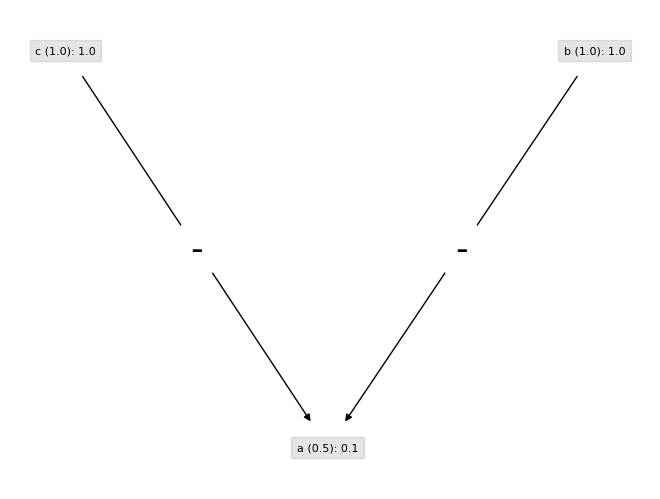

In [4]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
r_ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
r_ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print('Contribution b to a, removal:', r_ctrb_b_to_a)
print('Contribution c to a, removal:', r_ctrb_c_to_a)
print('Sum of contributions to a:', r_ctrb_b_to_a + r_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, removal: 0.0
Contribution c to a, removal: 0.0
Sum of contributions to a: 0.0
Final strength of a minus initial strength of a: -0.5


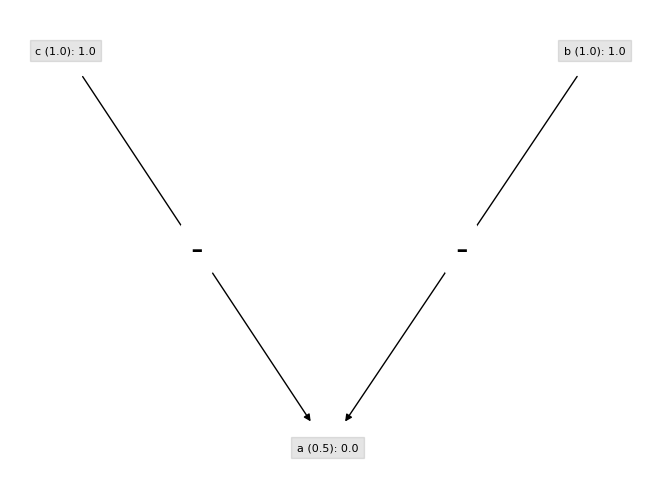

In [5]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
r_ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
r_ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print('Contribution b to a, removal:', r_ctrb_b_to_a)
print('Contribution c to a, removal:', r_ctrb_c_to_a)
print('Sum of contributions to a:', r_ctrb_b_to_a + r_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, removal: 0.0
Contribution c to a, removal: 0.0
Sum of contributions to a: 0.0
Final strength of a minus initial strength of a: -0.25


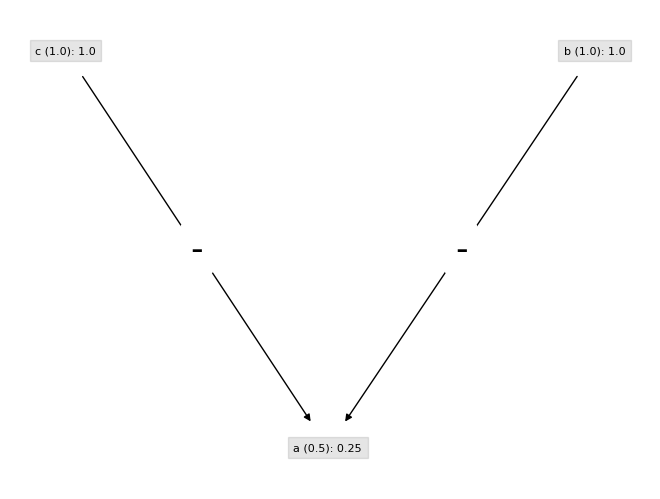

In [6]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
r_ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
r_ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print('Contribution b to a, removal:', r_ctrb_b_to_a)
print('Contribution c to a, removal:', r_ctrb_c_to_a)
print('Sum of contributions to a:', r_ctrb_b_to_a + r_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Quantitative Contribution Existence

Contribution b to a, removal: -0.06898759887294448
Contribution c to a, removal: -0.06898759887294448
Sum of contributions to a: -0.13797519774588896
Final strength of a minus initial strength of a: -0.20246579625022176


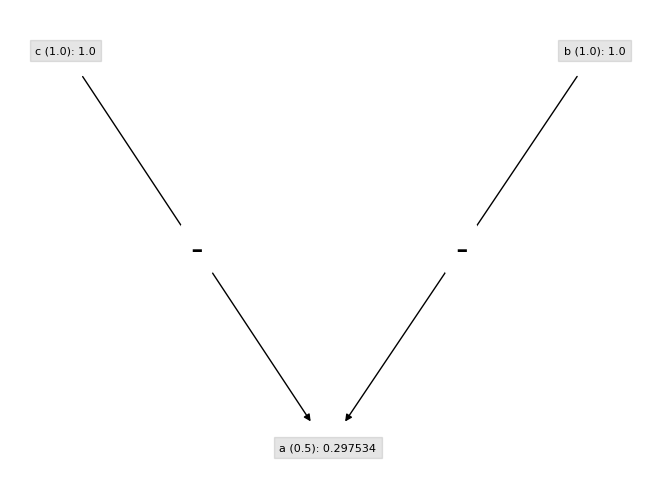

In [7]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
r_ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
r_ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print('Contribution b to a, removal:', r_ctrb_b_to_a)
print('Contribution c to a, removal:', r_ctrb_c_to_a)
print('Sum of contributions to a:', r_ctrb_b_to_a + r_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, removal: 0.0
Contribution c to a, removal: 0.0
Sum of contributions to a: 0.0
Final strength of a minus initial strength of a: -0.13347819737727729


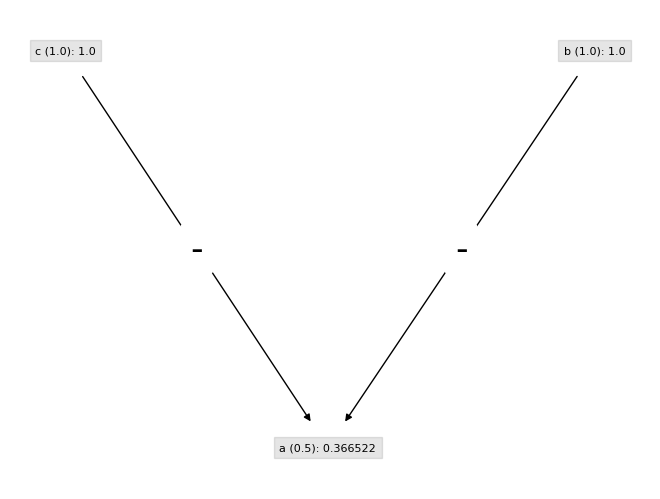

In [ ]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
r_ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
r_ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print('Contribution b to a, removal:', r_ctrb_b_to_a)
print('Contribution c to a, removal:', r_ctrb_c_to_a)
print('Sum of contributions to a:', r_ctrb_b_to_a + r_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

### Intrinsic Removal

#### Quadratic Semantics Violates Quantitative Contribution Existence

Contribution b to a, intrinsic removal: -0.15000000000000002
Contribution c to a, intrinsic removal: -0.15000000000000002
Sum of contributions to a: -0.30000000000000004
Final strength of a minus initial strength of a: -0.4


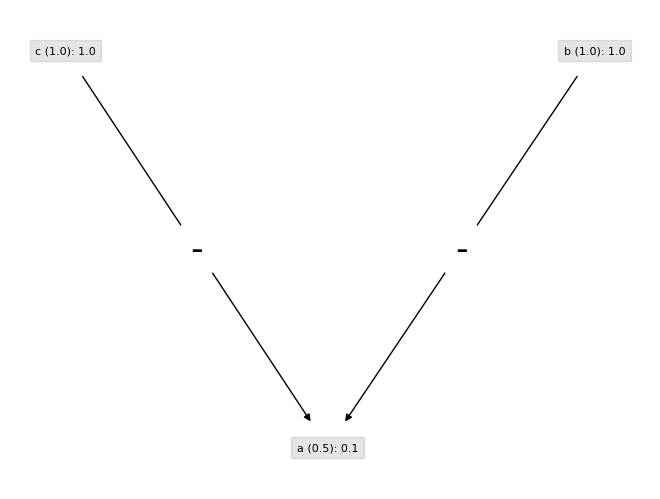

In [9]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
i_ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
i_ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print('Contribution b to a, intrinsic removal:', i_ctrb_b_to_a)
print('Contribution c to a, intrinsic removal:', i_ctrb_c_to_a)
print('Sum of contributions to a:', i_ctrb_b_to_a + i_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, intrinsic removal: 0.0
Contribution c to a, intrinsic removal: 0.0
Sum of contributions to a: 0.0
Final strength minus initial strength of a -0.5


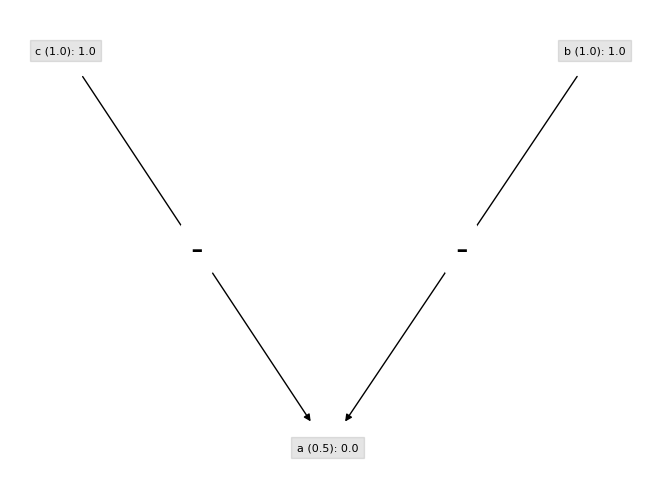

In [10]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
i_ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
i_ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print('Contribution b to a, intrinsic removal:', i_ctrb_b_to_a)
print('Contribution c to a, intrinsic removal:', i_ctrb_c_to_a)
print('Sum of contributions to a:', i_ctrb_b_to_a + i_ctrb_c_to_a)
print('Final strength minus initial strength of a',  qbaf.final_strength('a')- 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, intrinsic removal: 0.0
Contribution c to a, intrinsic removal: 0.0
Sum of contributions to a: 0.0
Final strength minus initial strength of a -0.25


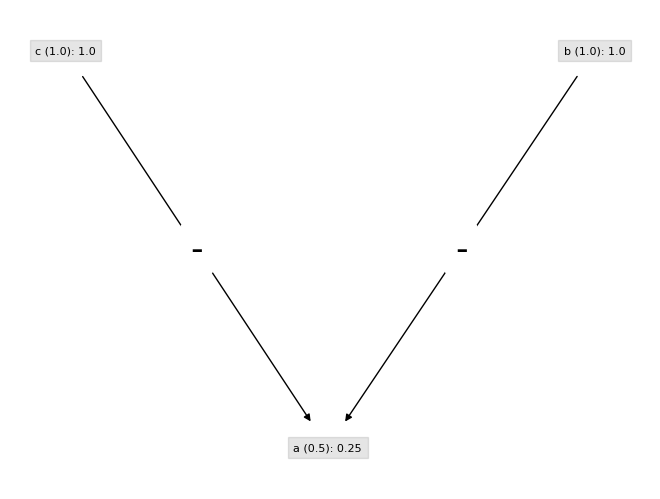

In [11]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
i_ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
i_ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print('Contribution b to a, intrinsic removal:', i_ctrb_b_to_a)
print('Contribution c to a, intrinsic removal:', i_ctrb_c_to_a)
print('Sum of contributions to a:', i_ctrb_b_to_a + i_ctrb_c_to_a)
print('Final strength minus initial strength of a',  qbaf.final_strength('a')- 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Quantitative Contribution Existence

Contribution b to a, intrinsic removal: -0.06898759887294448
Contribution c to a, intrinsic removal: -0.06898759887294448
Sum of contributions to a: -0.13797519774588896
Final strength minus initial strength of a -0.20246579625022176


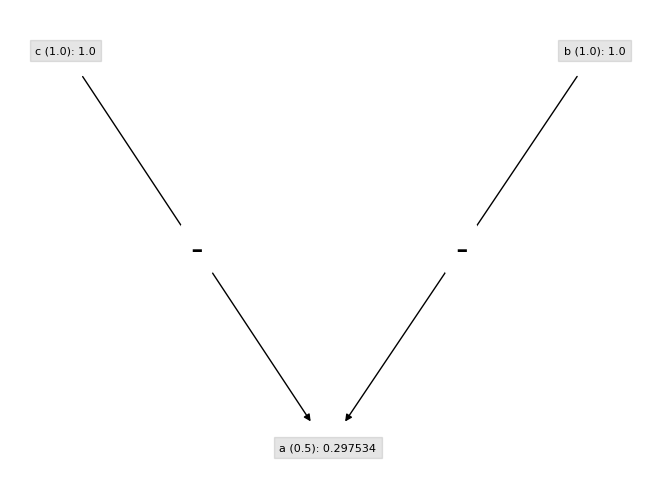

In [12]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
i_ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
i_ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print('Contribution b to a, intrinsic removal:', i_ctrb_b_to_a)
print('Contribution c to a, intrinsic removal:', i_ctrb_c_to_a)
print('Sum of contributions to a:', i_ctrb_b_to_a + i_ctrb_c_to_a)
print('Final strength minus initial strength of a',  qbaf.final_strength('a')- 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution of b to a: 0.0
Contribution of c to a: 0.0


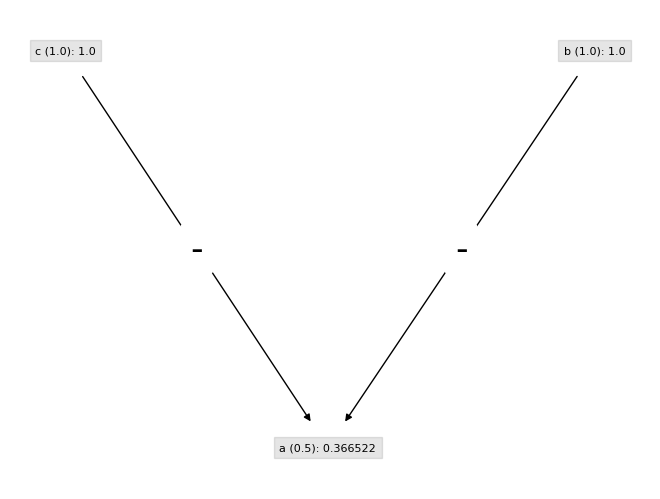

In [13]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('b', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
visualize(qbaf, with_fs=True, round_to=6)

### Gradient

#### Quadratic Energy Semantics Violates Quantitative Contribution Existence
Given a topic argument has merely one contributor, we merely need to show that the contributor's gradient contribution to the topic argument differs from its Shapley value contribution.

Contribution b to a, gradient: -0.07999999821186066
Contribution c to a, gradient: -0.07999999821186066
Sum of contributions to a: -0.1599999964237213
Final strength of a minus initial strength of a: -0.4


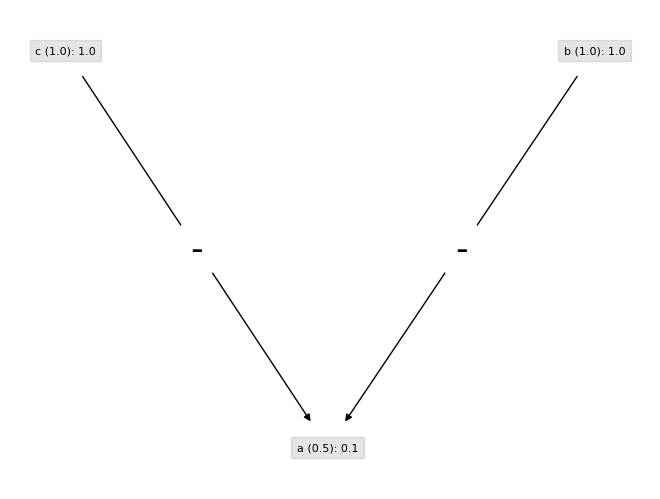

In [14]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
g_ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)
print('Contribution c to a, gradient:', g_ctrb_c_to_a)
print('Sum of contributions to a:', g_ctrb_b_to_a + g_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution b to a, gradient: 0.0
Contribution c to a, gradient: 0.0


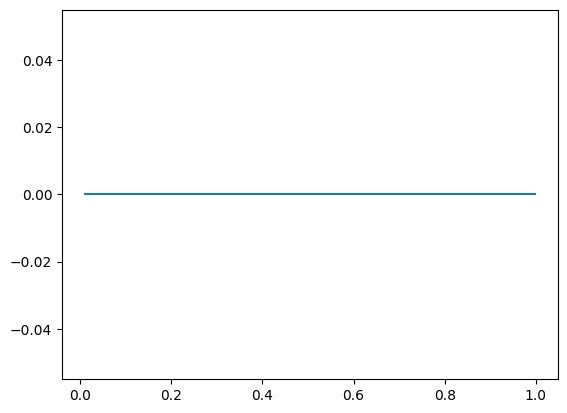

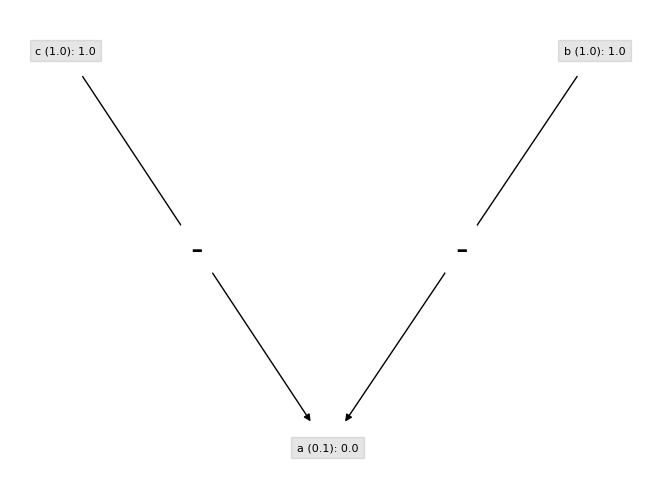

In [15]:
args = ['a', 'b', 'c']
initial_strengths = [0.1, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
g_ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)
print('Contribution c to a, gradient:', g_ctrb_c_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 1000):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'b', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas))
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution c to a, gradient: 0.0
Contribution b to a, gradient: 0.0


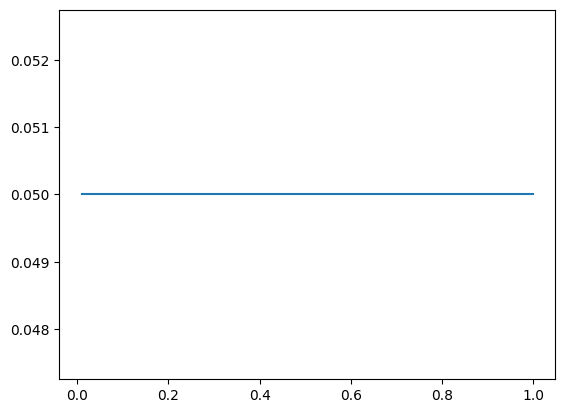

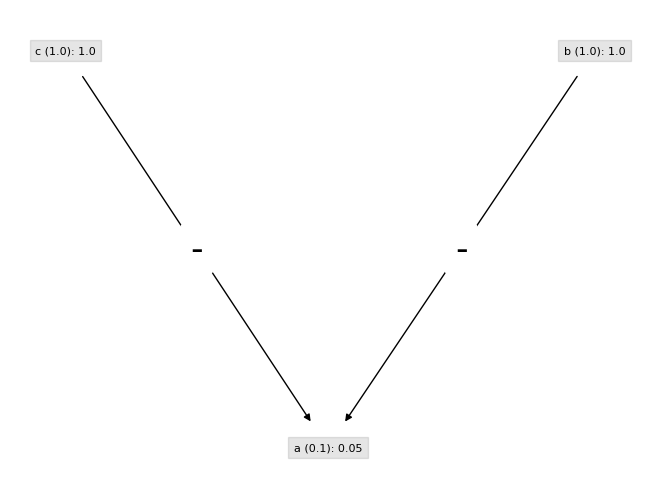

In [16]:
args = ['a', 'b', 'c']
initial_strengths = [0.1, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
g_ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
print('Contribution c to a, gradient:', g_ctrb_c_to_a)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 1000):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'b', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas))
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Quantitative Contribution Existence

Contribution b to a, gradient: -0.04452154040336609
Contribution c to a, gradient: -0.04452154040336609
Sum of contributions to a: -0.08904308080673218
Final strength of a minus initial strength of a: -0.20246579625022176


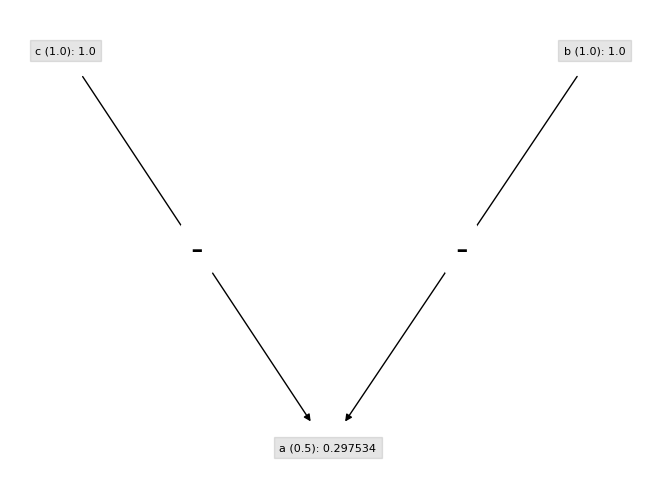

In [17]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
g_ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)
print('Contribution c to a, gradient:', g_ctrb_c_to_a)
print('Sum of contributions to a:', g_ctrb_b_to_a + g_ctrb_c_to_a)
print('Final strength of a minus initial strength of a:', qbaf.final_strength('a') - 0.5)
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Contribution Existence and Quantitative Contribution Existence

Contribution c to a, gradient: 0.0
Contribution b to a, gradient: 0.0


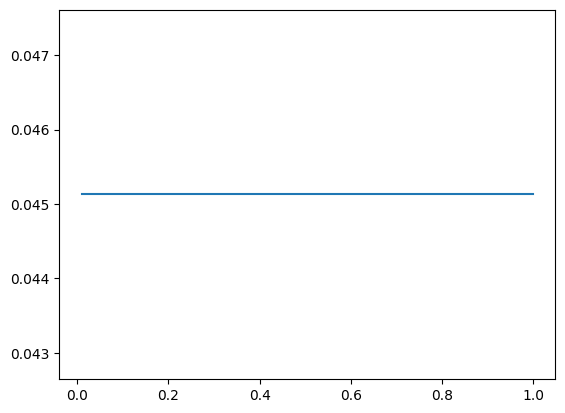

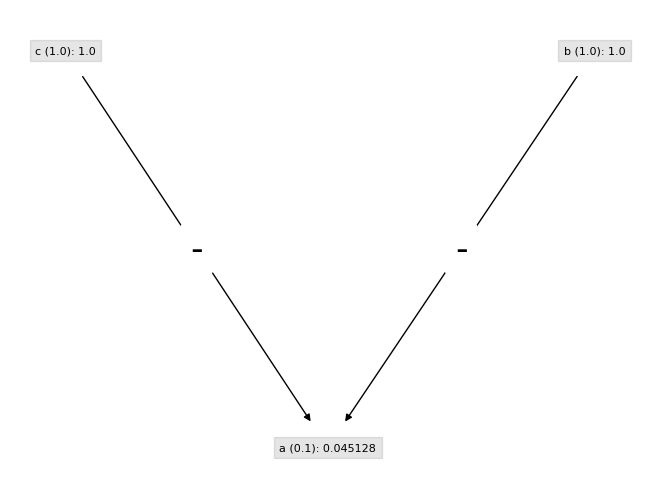

In [18]:
args = ['a', 'b', 'c']
initial_strengths = [0.1, 1, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
g_ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
print('Contribution c to a, gradient:', g_ctrb_c_to_a)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 1000):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'b', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas))
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

### Marginal Contributions in the Cases of Quadratic Energy and Euler-based Semantics

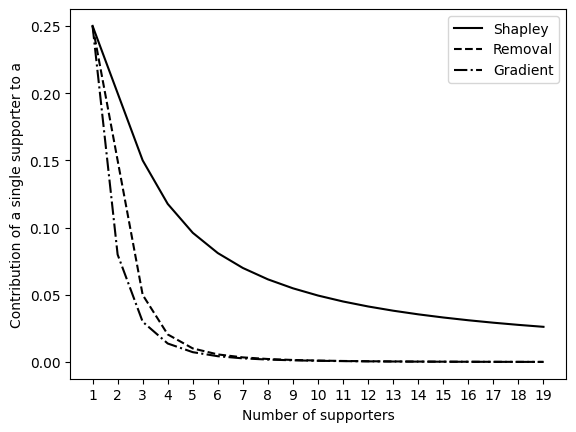

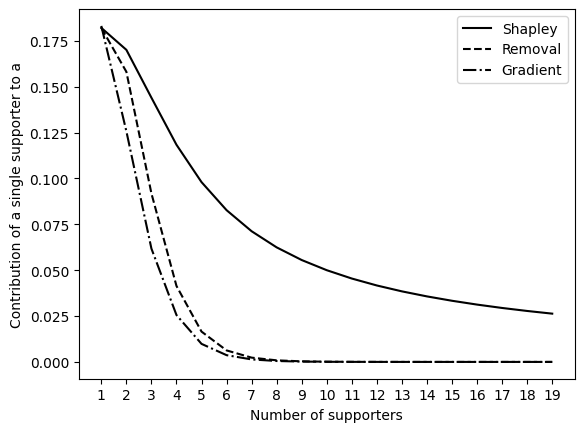

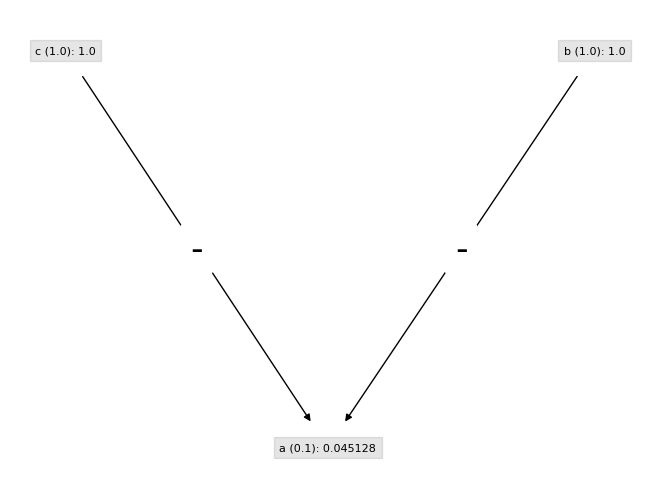

In [ ]:
def generate_contribution(number_supporters, semantics, ctrb_function):
  args = ['a']
  initial_strengths = [0.5]
  atts = []
  supps = []
  for i in range(0, number_supporters):
    args.append(f'b{i}')
    initial_strengths.append(1)
    supps.append((f'b{i}', 'a'))
  qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=semantics)
  return ctrb_function('a', 'b0', qbaf)

arg_range = range(1, 20)

def plot_example():
    number_supporters = []
    sctrbs = []
    rctrbs = []
    gctrbs = []
    for i in arg_range:
        number_supporters.append(i)
        sctrbs.append(generate_contribution(i, "QuadraticEnergy_model", determine_shapley_ctrb))
        rctrbs.append(generate_contribution(i, "QuadraticEnergy_model", determine_removal_ctrb))
        gctrbs.append(generate_contribution(i, "QuadraticEnergy_model", determine_gradient_ctrb))
    plt.plot(np.array(number_supporters), np.array(sctrbs), label ='Shapley', color='black')
    plt.plot(np.array(number_supporters), np.array(rctrbs),'--', label ='Removal', color='black')
    plt.plot(np.array(number_supporters), np.array(gctrbs),'-.', label ='Gradient', color='black')
    plt.legend()
    plt.xticks(arg_range)
    plt.ylabel('Contribution of a single supporter to a')
    plt.xlabel('Number of supporters')
    plt.show()
plot_example()

def plot_example():
    number_supporters = []
    sctrbs = []
    rctrbs = []
    gctrbs = []
    for i in arg_range:
        number_supporters.append(i)
        sctrbs.append(generate_contribution(i, "EulerBased_model", determine_shapley_ctrb))
        rctrbs.append(generate_contribution(i, "EulerBased_model", determine_removal_ctrb))
        gctrbs.append(generate_contribution(i, "EulerBased_model", determine_gradient_ctrb))
    plt.plot(np.array(number_supporters), np.array(sctrbs), label ='Shapley', color='black')
    plt.plot(np.array(number_supporters), np.array(rctrbs),'--', label ='Removal', color='black')
    plt.plot(np.array(number_supporters), np.array(gctrbs),'-.', label ='Gradient', color='black')
    plt.legend()
    plt.xticks(arg_range)
    plt.ylabel('Contribution of a single supporter to a')
    plt.xlabel('Number of supporters')
    plt.show()
plot_example()


visualize(qbaf, with_fs=True, round_to=6)

## Strong Faithfulness and (Quantitative) Local Faithfulness

### Removal

#### Quadratic Energy Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, removal: -0.01122225976433966
Contribution d to a, gradient: 0.029868774116039276


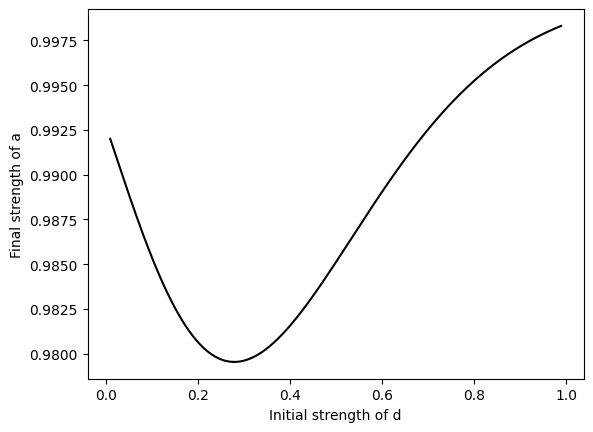

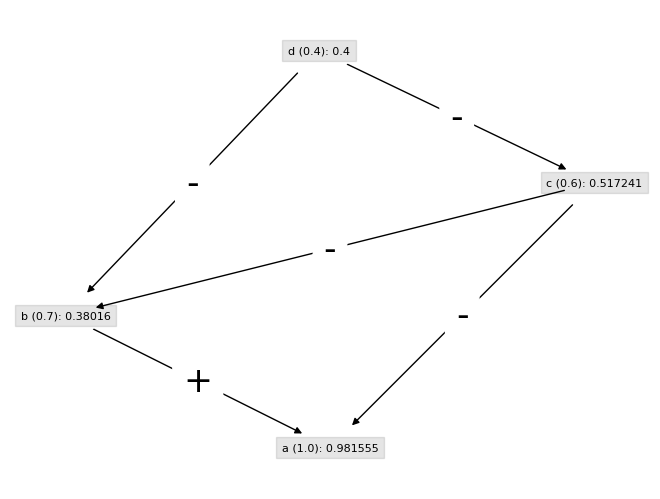

In [20]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.4]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
r_ctrb_d_to_a = determine_removal_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, removal:', r_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('removal_qe.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, removal: 0.31999999999999995
Contribution d to a, gradient: 0.0


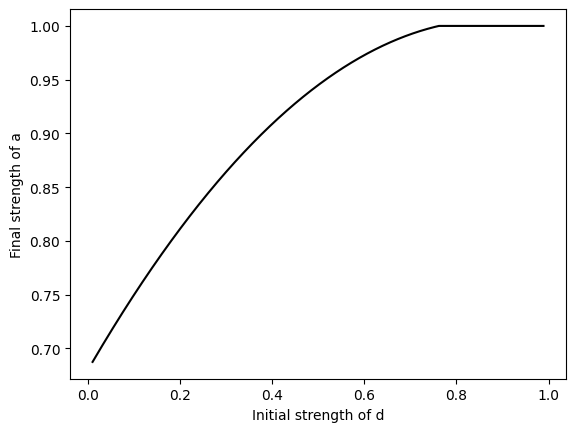

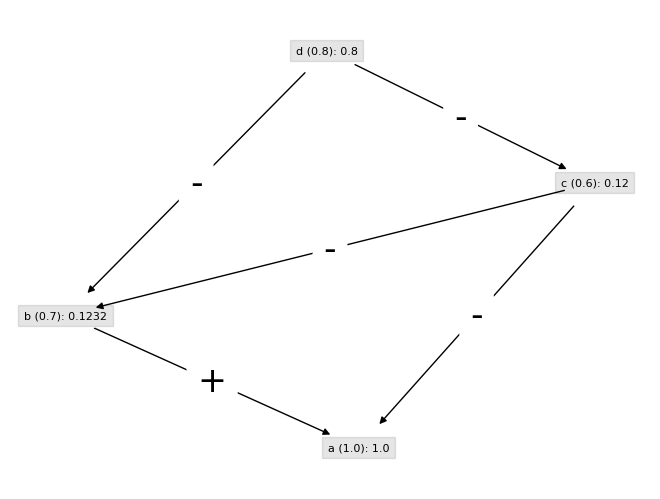

In [21]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.8]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
r_ctrb_d_to_a = determine_removal_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, removal:', r_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('removal_df.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, removal: 0.13978494623655913
Contribution d to a, gradient: 0.0


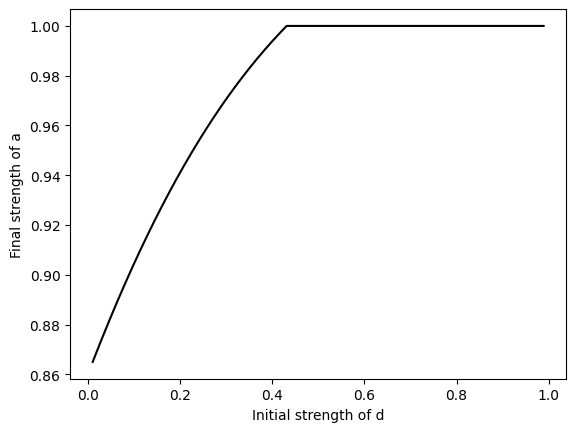

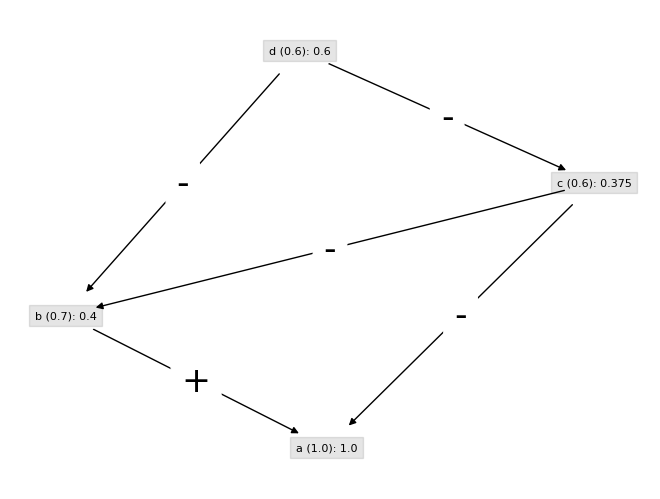

In [22]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.6]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
r_ctrb_d_to_a = determine_removal_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, removal:', r_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('removal_sd.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Strong Faithfulness andd (Quantitative) Local Faithfulness

Contribution d to a, removal: 0.0016079568186256887
Contribution d to a, gradient: -0.0020039379596710205


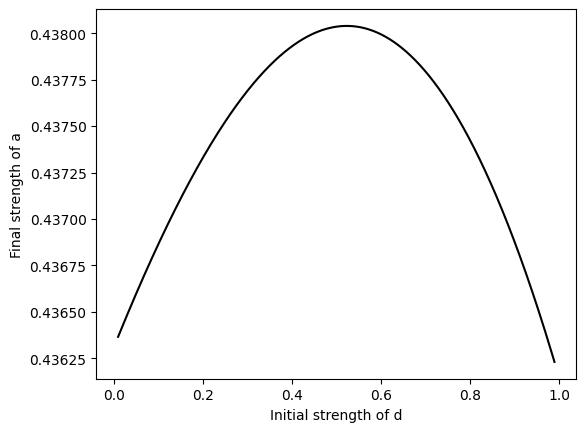

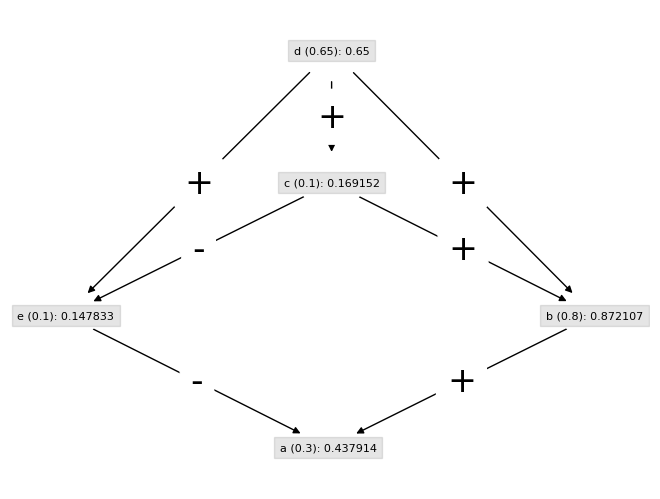

In [23]:
args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0.3, 0.8, 0.1, 0.65, 0.1]
atts = [  ('e', 'a'), ('c', 'e')]
supps = [('b', 'a'), ('c', 'b'),  ('d', 'b'), ('d', 'c'), ('d', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
r_ctrb_d_to_a = determine_removal_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, removal:', r_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.subplots_adjust(left=0.15)
    plt.savefig('removal_eb.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, removal: 0.01303195753286912
Contribution d to a, gradient: 0.0


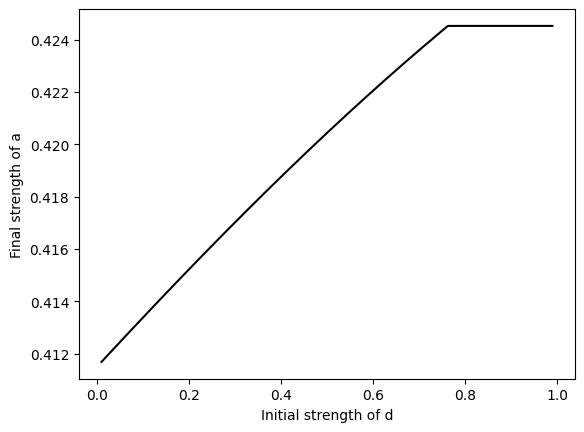

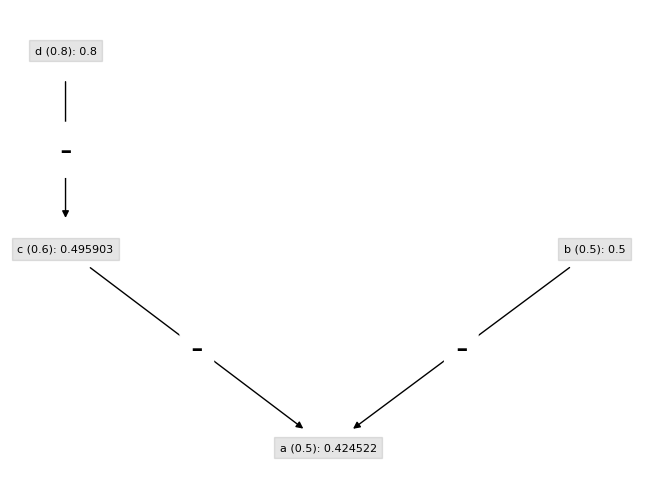

In [24]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [0.5, 0.5, 0.6, 0.8]
atts = [('b', 'a'), ('c', 'a'), ('d', 'c')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
r_ctrb_d_to_a = determine_removal_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, removal:', r_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('removal_ebt.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

### Intrinsic Removal

#### Quadratic Energy Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, intrinsic removal: -0.01122225976433966
Contribution d to a, gradient: 0.029868774116039276


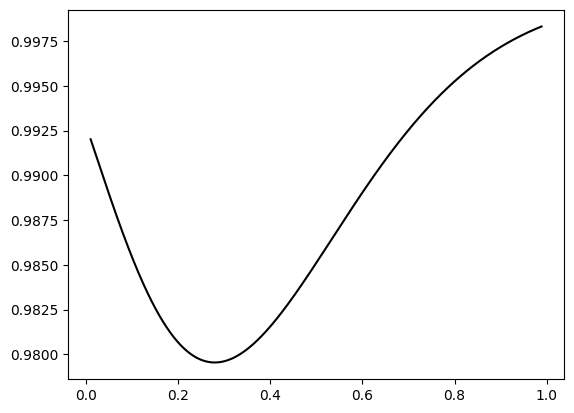

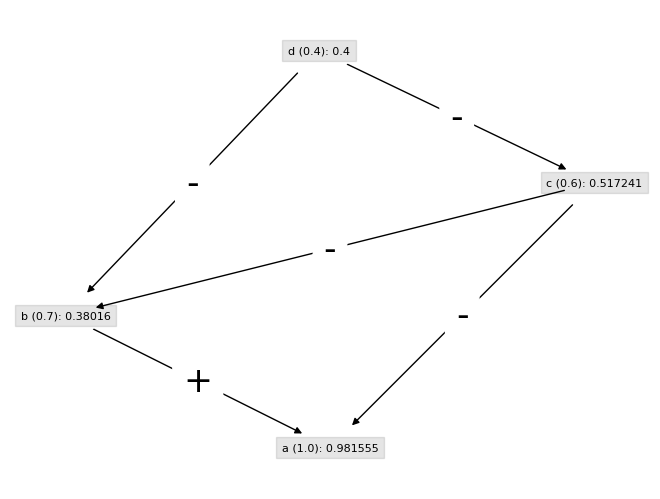

In [25]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.4]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
ir_ctrb_d_to_a = determine_iremoval_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, intrinsic removal:', ir_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, intrinsic removal: 0.31999999999999995
Contribution d to a, gradient: 0.0


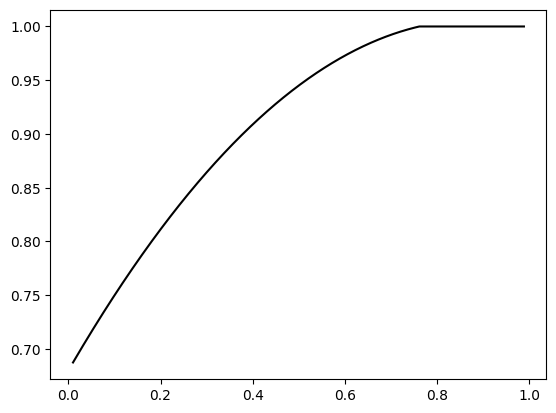

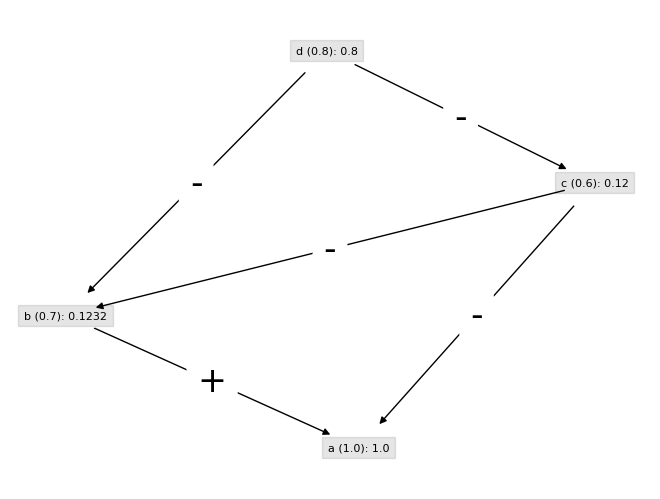

In [26]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.8]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
ir_ctrb_d_to_a = determine_iremoval_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, intrinsic removal:', ir_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, intrinsic removal: 0.13978494623655913
Contribution d to a, gradient: 0.0


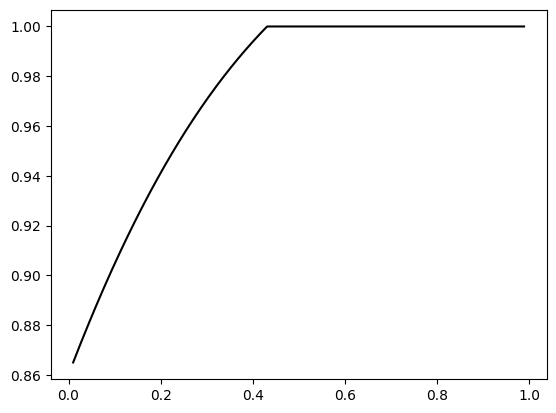

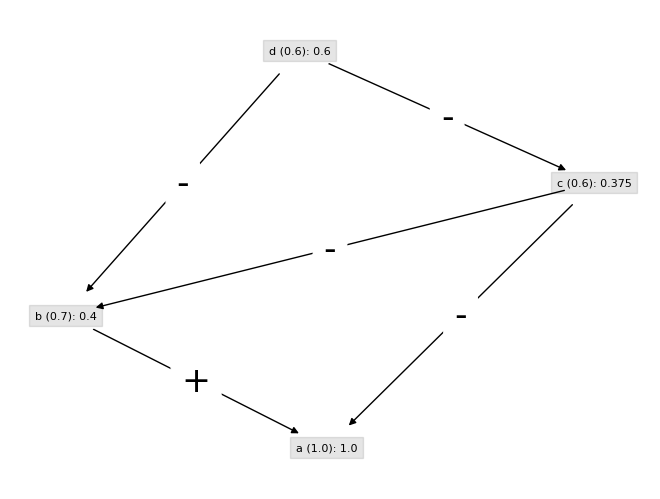

In [27]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.6]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
ir_ctrb_d_to_a = determine_iremoval_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, intrinsic removal:', ir_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, intrinsic removal: 0.0016079568186256887
Contribution d to a, gradient: -0.0020039379596710205


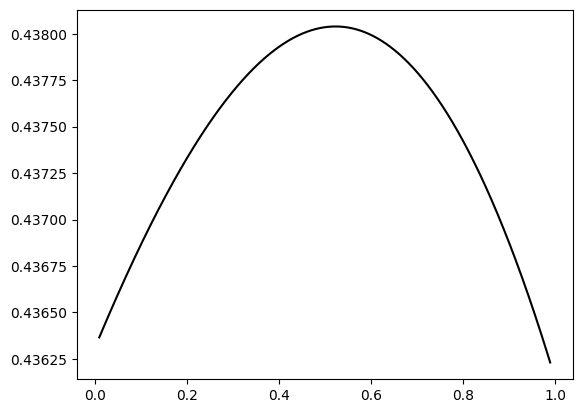

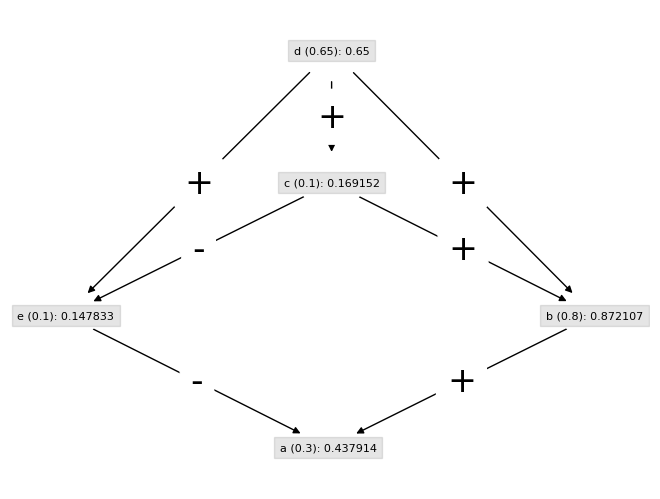

In [28]:
args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0.3, 0.8, 0.1, 0.65, 0.1]
atts = [  ('e', 'a'), ('c', 'e')]
supps = [('b', 'a'), ('c', 'b'),  ('d', 'b'), ('d', 'c'), ('d', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
ir_ctrb_d_to_a = determine_iremoval_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, intrinsic removal:', ir_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, intrinsic removal: 0.01303195753286912
Contribution d to a, gradient: 0.0


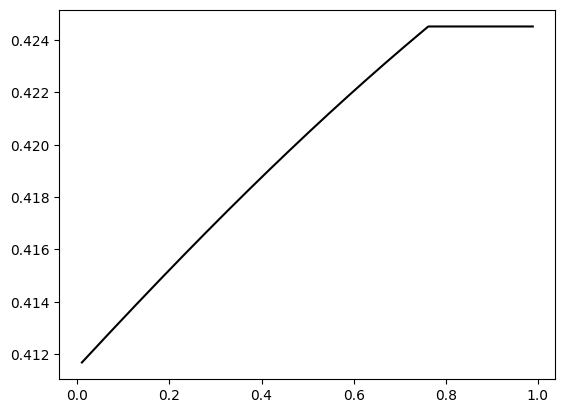

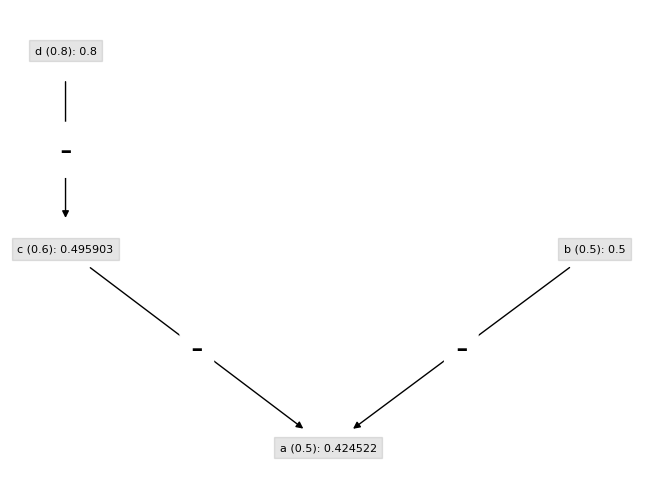

In [29]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [0.5, 0.5, 0.6, 0.8]
atts = [('b', 'a'), ('c', 'a'), ('d', 'c')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
ir_ctrb_d_to_a = determine_iremoval_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, intrinsic removal:', ir_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example(semantics):
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.show()
plot_example('QuadraticEnergy_model')
visualize(qbaf, with_fs=True, round_to=6)

### Shapley Values

#### Quadratic Energy Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, shapley: -0.0015950547092396699
Contribution d to a, gradient: 0.030199646949768066


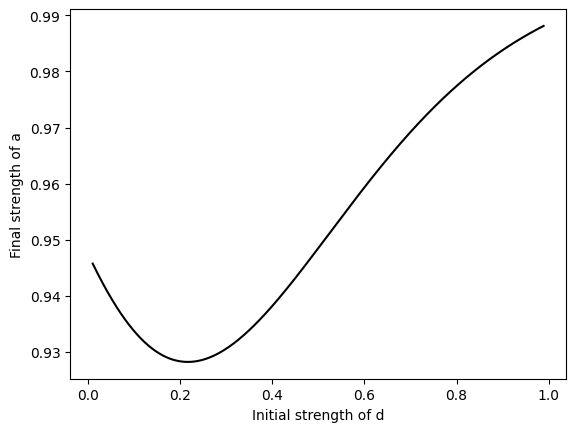

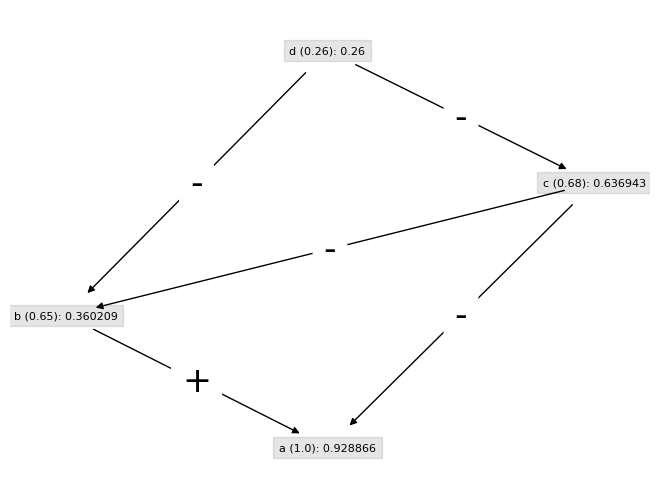

In [30]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.65, 0.68, 0.26]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
s_ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, shapley:', s_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('shapley_qe.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution a to e, shapley: -0.08333333333333333
Contribution a to e, gradient: 7.450580596923828e-09


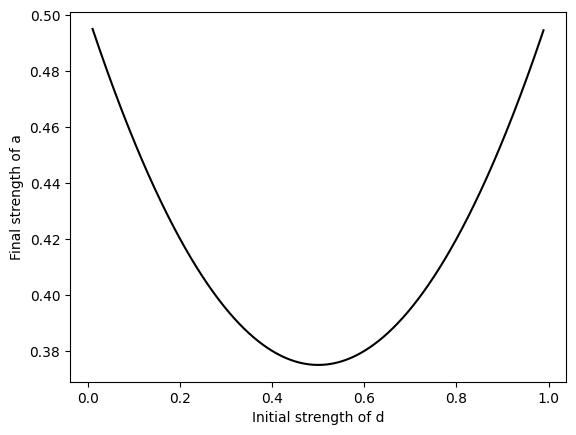

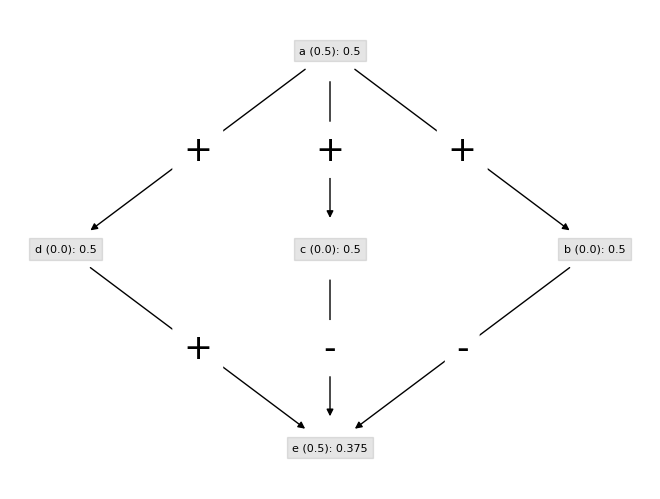

In [31]:
args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0.5, 0, 0, 0, 0.5]
atts = [('b', 'e'), ('c', 'e')]
supps = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('d', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
s_ctrb_e_to_a = determine_shapley_ctrb('e', 'a', qbaf)
g_ctrb_e_to_a = determine_gradient_ctrb('e', 'a', qbaf)
print('Contribution a to e, shapley:', s_ctrb_e_to_a)
print('Contribution a to e, gradient:', g_ctrb_e_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'a', qbaf, 'e')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('shapley_df.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, shapley: 0.06364043662430759
Contribution d to a, gradient: 0.0


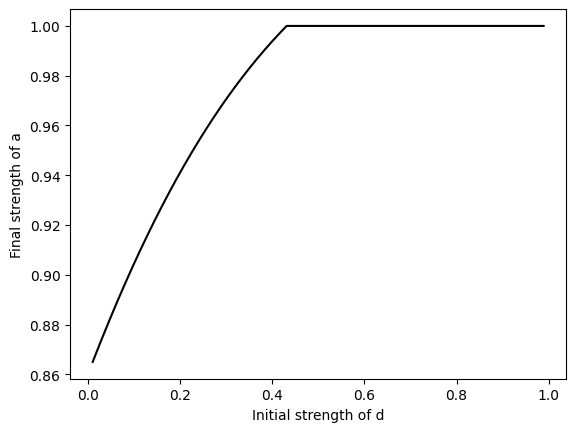

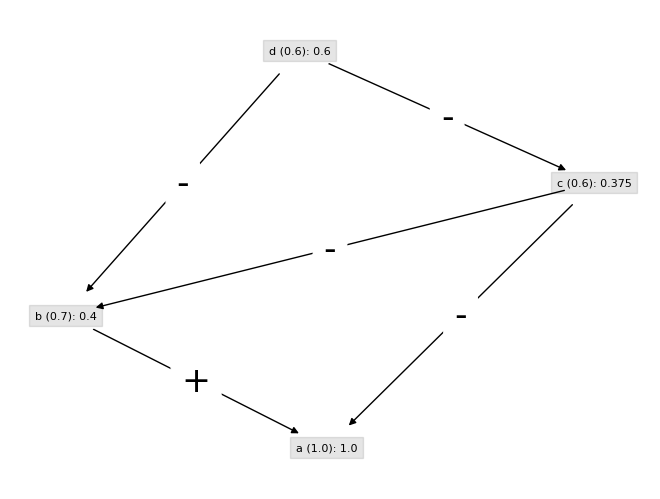

In [32]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [1, 0.7, 0.6, 0.6]
atts = [('c', 'b'), ('c', 'a'), ('d', 'b'),  ('d', 'c')]
supps = [('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="SquaredDFQuAD_model")
s_ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, shapley:', s_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.savefig('shapley_sd.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution d to a, shapley: 0.0007178118670143618
Contribution d to a, gradient: -0.0037010014057159424


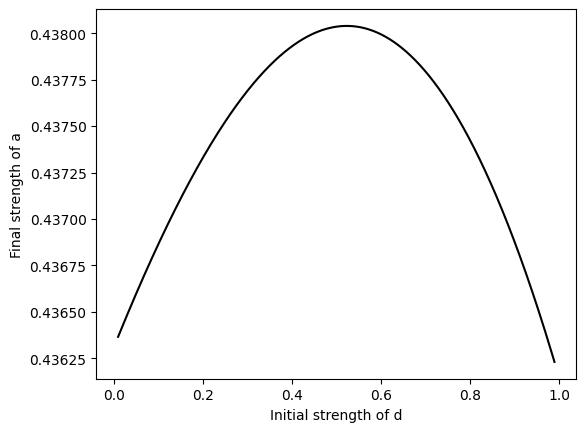

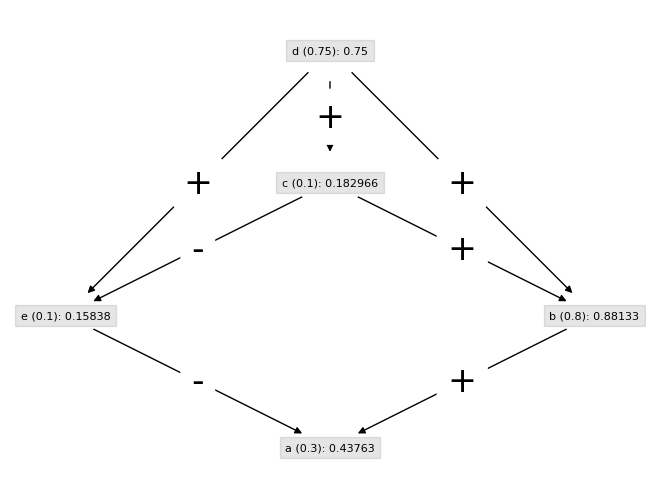

In [ ]:
args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0.3, 0.8, 0.1, 0.75, 0.1]
atts = [  ('e', 'a'), ('c', 'e')]
supps = [('b', 'a'), ('c', 'b'),  ('d', 'b'), ('d', 'c'), ('d', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
s_ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
g_ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print('Contribution d to a, shapley:', s_ctrb_d_to_a)
print('Contribution d to a, gradient:', g_ctrb_d_to_a)


def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'd', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of d')
    plt.ylabel('Final strength of a')
    plt.subplots_adjust(left=0.15)
    plt.savefig('shapley_eb.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Strong Faithfulness and (Quantitative) Local Faithfulness

Contribution b to a, shapley: -0.03773879839291305
Contribution b to a, gradient: 0.0


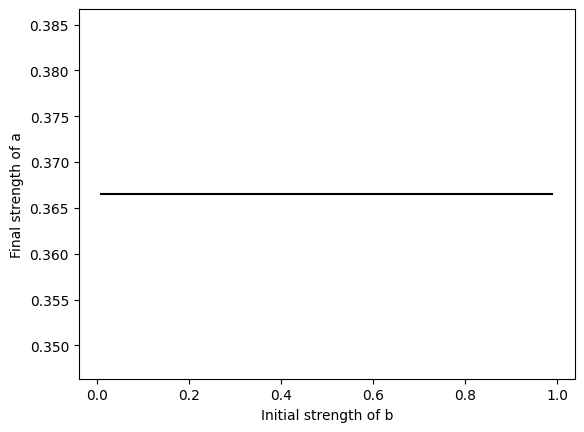

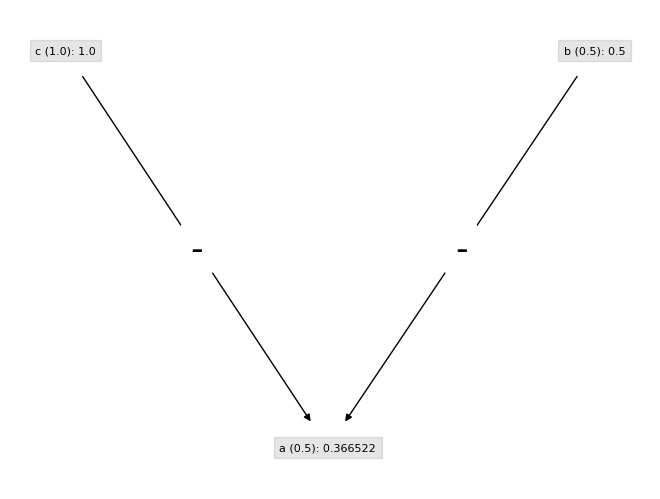

In [34]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.5, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_Model")
s_ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
g_ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
print('Contribution b to a, shapley:', s_ctrb_b_to_a)
print('Contribution b to a, gradient:', g_ctrb_b_to_a)

def plot_example():
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'b', qbaf, 'a')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.xlabel('Initial strength of b')
    plt.ylabel('Final strength of a')
    plt.savefig('shapley_ebt.pdf')
    plt.show()
plot_example()
visualize(qbaf, with_fs=True, round_to=6)

## (Quantitative) Counterfactuality

### Intrinsic Removal

#### Quadratic Energy Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: 0.0
Final strength a, qbaf: 0.8
Final strength a:, qbaf restricted to [a, c]: 1.0
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: -0.19999999999999996


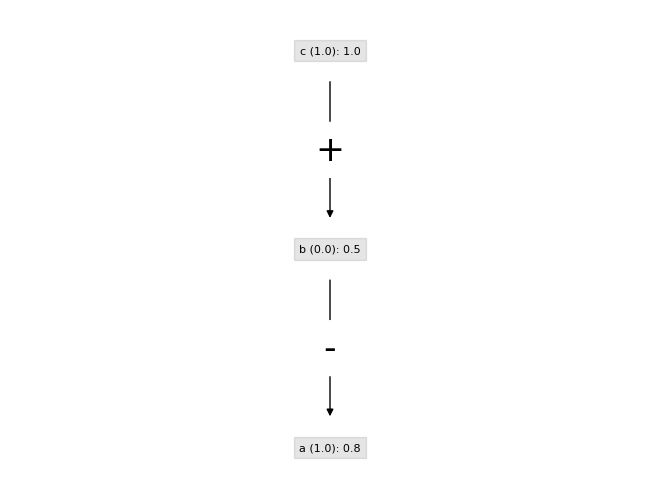

In [ ]:
args = ['a', 'b', 'c']
initial_strengths = [1, 0, 1]
atts = [('b', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: 0.0
Final strength a, qbaf: 0.0
Final strength a:, qbaf restricted to [a, c]: 0.8
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: -0.8


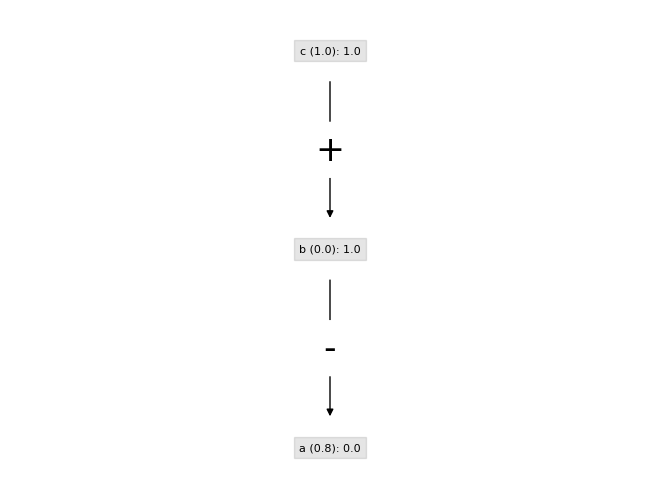

In [36]:
args = ['a', 'b', 'c']
initial_strengths = [0.8, 0, 1]
atts = [('b', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"DFQuAD_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: 0.0
Final strength a, qbaf: 0.5333333333333334
Final strength a:, qbaf restricted to [a, c]: 0.8
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: -0.2666666666666666


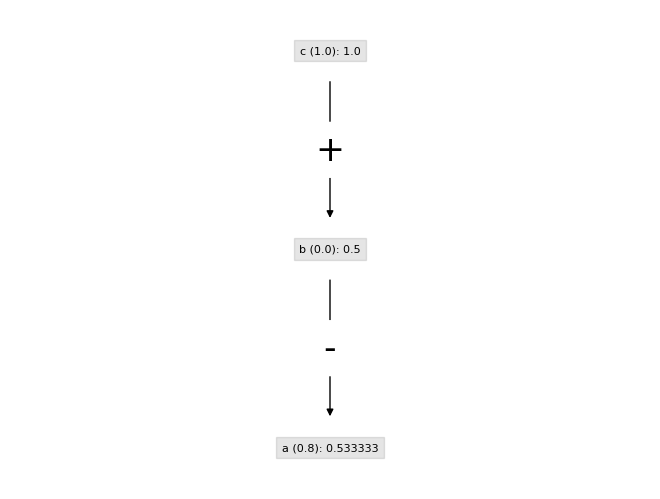

In [37]:
args = ['a', 'b', 'c']
initial_strengths = [0.8, 0, 1]
atts = [('b', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates (Quantitative) Counterfactuality

Contribution of e to a: 3.543092485180921e-06
Final strength a, qbaf: 0.5067080083835862
Final strength a:, qbaf restricted to [a, b, c, d, f, g]: 0.5067105086805717
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f, g]: -2.5002969854526214e-06


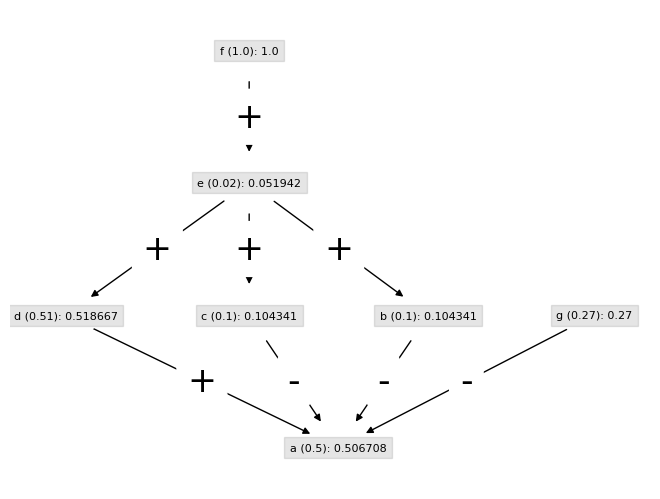

In [38]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
initial_strengths = [0.5, 0.1, 0.1, 0.51, 0.02, 1, 0.27]
atts = [('b', 'a'), ('c', 'a'), ('g', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_e_to_a = determine_iremoval_ctrb('a', 'e', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'f', 'g'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, f, g]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f, g]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: 0.0
Final strength a, qbaf: 0.6732589345559143
Final strength a:, qbaf restricted to [a, c, d]: 0.6877652068428899
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c, d]: -0.014506272286975541


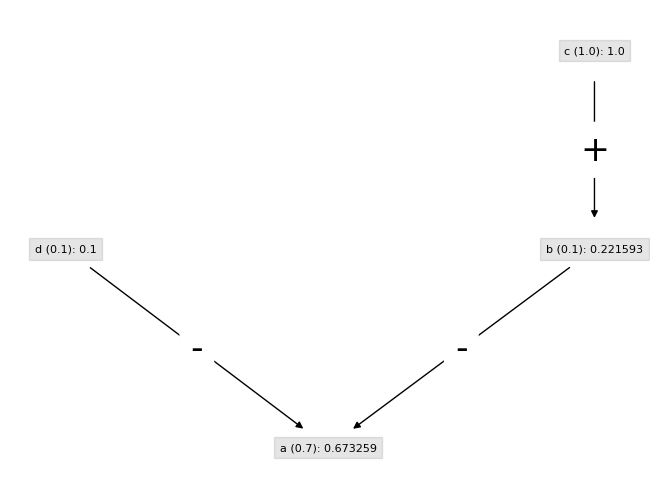

In [39]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [0.7, 0.1, 1, 0.1]
atts = [('b', 'a'), ('d', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBasedTop_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c', 'd'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c, d]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c, d]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

### Shapley Values

#### Quadratic Energy Semantics Violates (Quantitative) Counterfactuality

-0.017132528900946947
0.08286747109905306
Contribution of e to a: 4.932615331399619e-05
Final strength a, qbaf: 0.08286747109905307
Final strength a:, qbaf restricted to [a, b, c, d, f]: 0.097799511002445
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: -0.014932039903391925


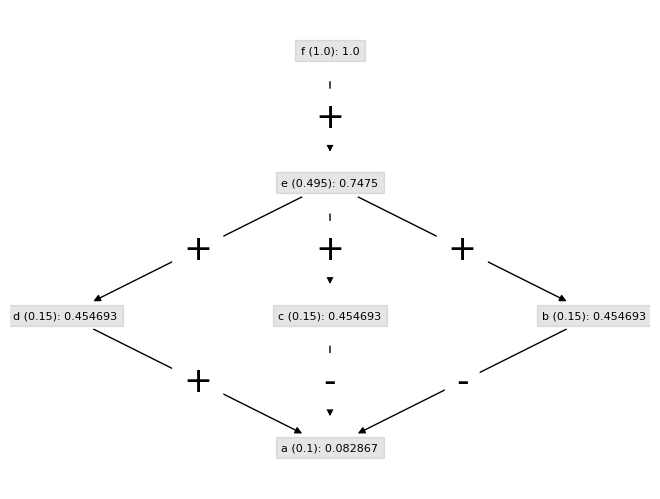

In [40]:
args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.1, 0.15, 0.15, 0.15, 0.495, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
print(0.1 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
###
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'f'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates (Quantitative) Counterfactuality

4.9439619065339e-17
0.10000000000000006
Contribution of e to a: 0.0026916678124999953
Final strength a, qbaf: 0.1
Final strength a:, qbaf restricted to [a, b, c, d, f]: 0.10494999999999996
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: -0.0049499999999999544


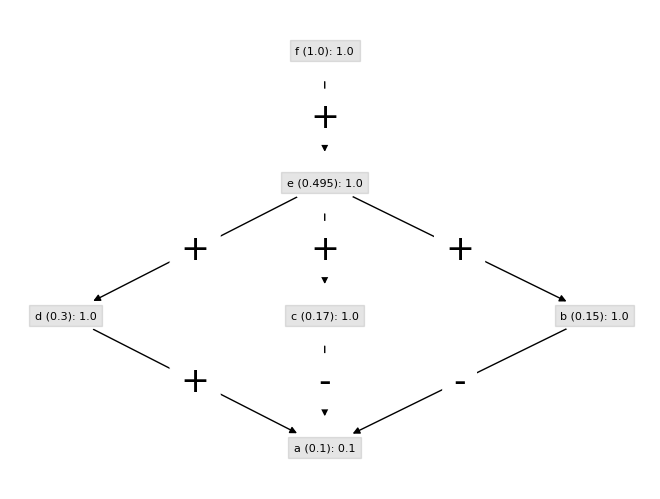

In [41]:
args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.1, 0.15, 0.17, 0.3, 0.495, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"DFQuAD_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
print(0.1 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
###
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'f'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates (Quantitative) Counterfactuality

-0.018113531350922862
0.08188646864907714
Contribution of e to a: 0.002129861564122412
Final strength a, qbaf: 0.08188646864907714
Final strength a:, qbaf restricted to [a, b, c, d, f]: 0.09280742459396751
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: -0.01092095594489037


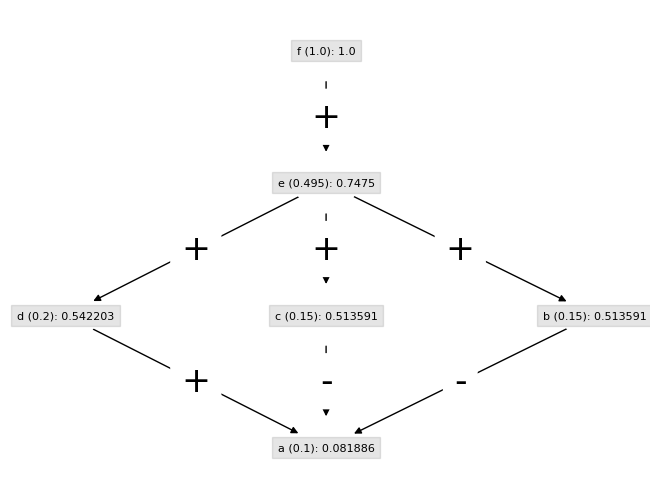

In [42]:
args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.1, 0.15, 0.15, 0.2, 0.495, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
print(0.1 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
###
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'f'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, f]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates (Quantitative) Counterfactuality

-0.011210726511239236
0.28878927348876077
Contribution of f to a: 3.4379641720427845e-06
Final strength a, qbaf: 0.2887892734887608
Final strength a:, qbaf restricted to [a, b, c, d, e, g]: 0.2888676426787433
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, e, g]: -7.836918998249676e-05


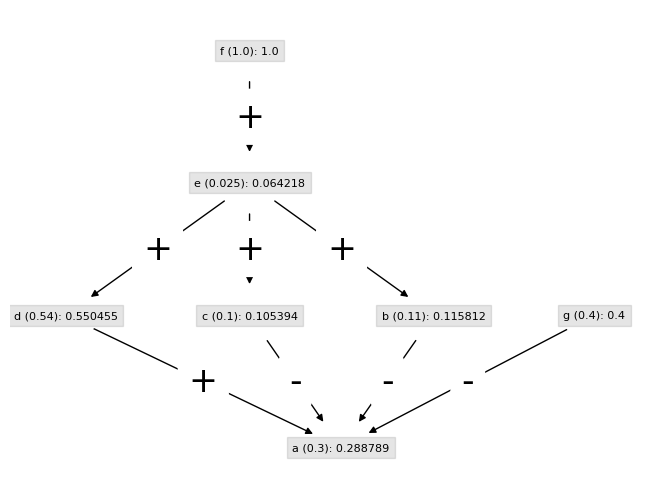

In [43]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
initial_strengths = [0.3, 0.11, 0.1, 0.54, 0.025, 1, 0.4]
atts = [('b', 'a'), ('c', 'a'), ('g', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_g_to_a = determine_shapley_ctrb('a', 'g', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
print(0.3 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
###
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'e', 'g'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, e, g]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, e, g]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates (Quantitative) Counterfactuality

0.002987889455238993
0.30298788945523897
Contribution of f to a: -2.7043175132035456e-05
Final strength a, qbaf: 0.302987889455239
Final strength a:, qbaf restricted to [a, b, c, d, e, g]: 0.30291455848977833
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, e, g, h]: 7.333096546069395e-05


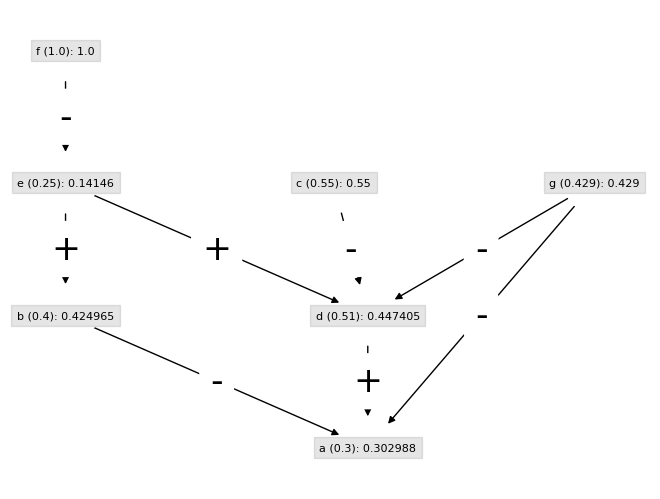

In [44]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
initial_strengths = [0.3, 0.4, 0.55,  0.51, 0.25, 1, 0.429]
atts = [('b', 'a'), ('g', 'a'), ('f', 'e'), ('c', 'd'), ('g', 'd')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'd')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBasedTop_model")
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_g_to_a = determine_shapley_ctrb('a', 'g', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
print(0.3 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
###
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd', 'e', 'g'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d, e, g]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d, e, g, h]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

### Gradient

#### Quadratic Energy Semantics Violates (Quantitative) Counterfactuality

Contribution of d to a: 0.03609579801559448
Final strength a, qbaf: 0.39554738206935747
Final strength a:, qbaf restricted to [a, b, c]: 0.36764705882352944
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c]: 0.02790032324582803


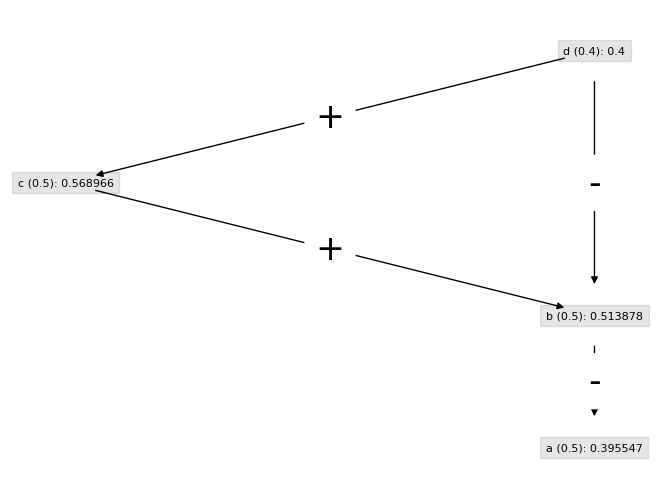

In [ ]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [0.5, 0.5, 0.5, 0.4]
atts = [('b', 'a'), ('d', 'b')]
supps = [('d', 'c'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of d to a: {ctrb_d_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, b, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates (Quantitative) Counterfactuality

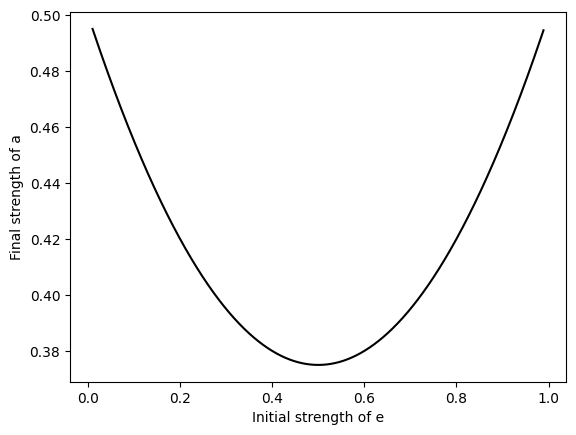

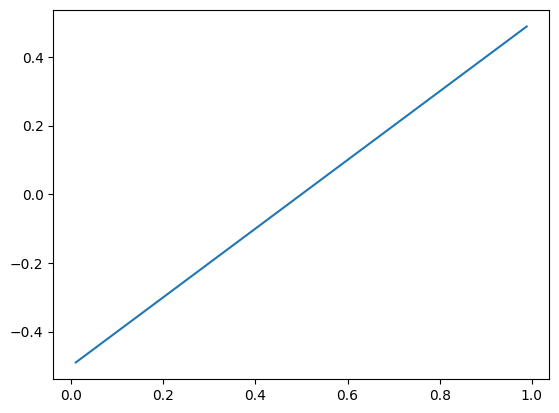

0.5
0.0
True
Contribution of e to a: 0.000000007450581
Final strength a, qbaf: 0.375000000000000
Final strength a:, qbaf restricted to [a, b, c, d]: 0.500000000000000
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d]: -0.125


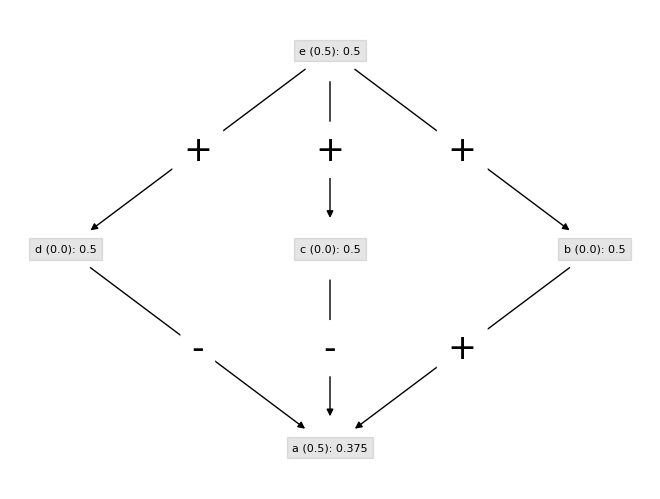

In [46]:
args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0, 0, 0, 0, 0.5]
atts = [('b', 'e'), ('c', 'e')]
supps = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('d', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics='DFQuAD_model')

def plot_example(semantics):
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        ises.append(fise)
        fsas.append(abs(func(fise, 'a', qbaf, 'e')))
    plt.plot(np.array(ises), np.array(fsas), color='black')
    plt.ylabel('Final strength of a')
    plt.xlabel('Initial strength of e')
    plt.show()
plot_example('DFQuAD_model')

def plot_gradient(semantics):
    ises = []
    fsas = []
    for ise in range(10, 990):
        fise = ise / 1000
        args = ['a', 'b', 'c', 'd', 'e']
        initial_strengths = [0.5, 0, 0, 0, fise]
        atts = [('c', 'a'), ('d', 'a')]
        supps = [('e', 'b'), ('e', 'c'), ('e', 'd'), ('b', 'a')]
        qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f'{semantics}')
        ises.append(fise)
        fsas.append(determine_gradient_ctrb('a', 'e', qbaf))
    abs_fsas = np.array([abs(ctrb) for ctrb in fsas])
    global abs_minimum
    abs_minimum = ises[np.argmin(abs_fsas)]
    plt.plot(np.array(ises), np.array(fsas))
    plt.show()
plot_gradient('DFQuAD_model')

args = ['a', 'b', 'c', 'd', 'e']
initial_strengths = [0.5, 0, 0, 0, abs_minimum]
atts = [('c', 'a'), ('d', 'a')]
supps = [('e', 'b'), ('e', 'c'), ('e', 'd'), ('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics='DFQuAD_model')
print(abs_minimum)
print(round(determine_gradient_ctrb('a', 'e', qbaf), 7))
print(round(determine_gradient_ctrb('a', 'e', qbaf), 7) == 0)
visualize(qbaf, with_fs=True, round_to=6)
ctrb_e_to_a = determine_gradient_ctrb('a', 'e', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'b', 'c', 'd'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of e to a: {"{0:.15f}".format(ctrb_e_to_a)}')
print(f'Final strength a, qbaf: {"{0:.15f}".format(fs_a_qbaf)}')
print(f'Final strength a:, qbaf restricted to [a, b, c, d]: {"{0:.15f}".format(fs_a_qbaf_restriction)}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, b, c, d]: {fs_a_qbaf - fs_a_qbaf_restriction}')

#### Squared DFQuAD Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: -0.25
Final strength a, qbaf: 0.5
Final strength a:, qbaf restricted to [a, c]: 0.5
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: 0.0


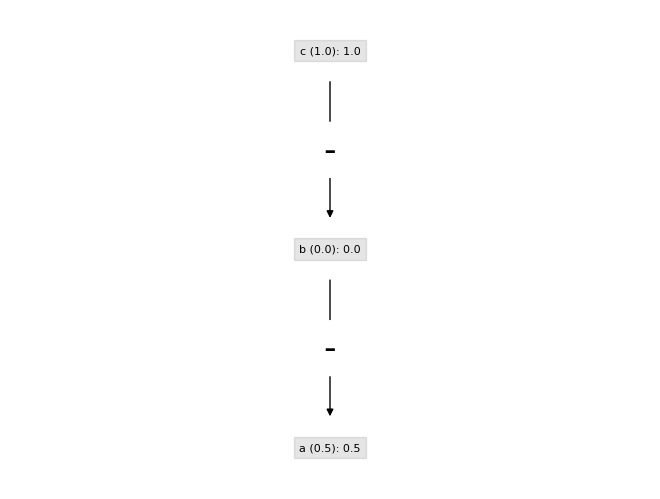

In [47]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0, 1]
atts = [('b', 'a'), ('c', 'b')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: -0.4530469551682472
Final strength a, qbaf: 0.5
Final strength a:, qbaf restricted to [a, c]: 0.5
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: 0.0


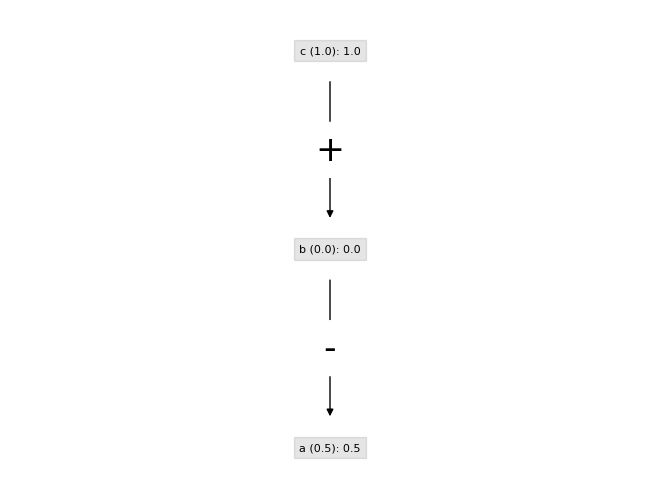

In [48]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0, 1]
atts = [('b', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates (Quantitative) Counterfactuality

Contribution of b to a: -0.4530469551682472
Final strength a, qbaf: 0.5
Final strength a:, qbaf restricted to [a, c]: 0.5
Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: 0.0


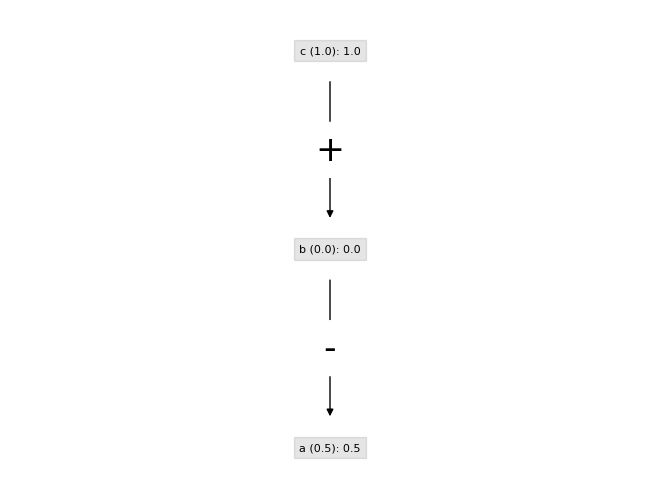

In [49]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0, 1]
atts = [('b', 'a')]
supps = [('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBasedTop_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
fs_a_qbaf = qbaf.final_strength('a')
qbaf_restriction = restrict(qbaf, ['a', 'c'])
fs_a_qbaf_restriction = qbaf_restriction.final_strength('a')
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Final strength a, qbaf: {fs_a_qbaf}')
print(f'Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf_restriction}')
print(f'Final strength a, qbaf - Final strength a:, qbaf restricted to [a, c]: {fs_a_qbaf - fs_a_qbaf_restriction}')
visualize(qbaf, with_fs=True, round_to=6)

## Proximity

### Removal

#### Quadratic Energy Semantics Violates Proximity

Contribution of b to a: -0.0012468827930174342
Contribution of c to a: 0.0037036122564875207
|Contribution of c to a| - |Contribution of b to a|: 0.0024567294634700865


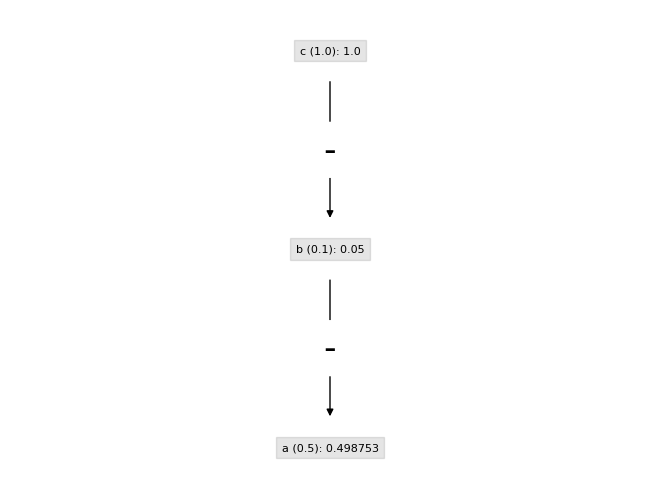

In [50]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 1]
atts = [('b', 'a'), ('c', 'b')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")
ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Proximity

Contribution of b to a: 0.0
Contribution of c to a: 0.04999999999999999
|Contribution of c to a| - |Contribution of b to a|: 0.04999999999999999


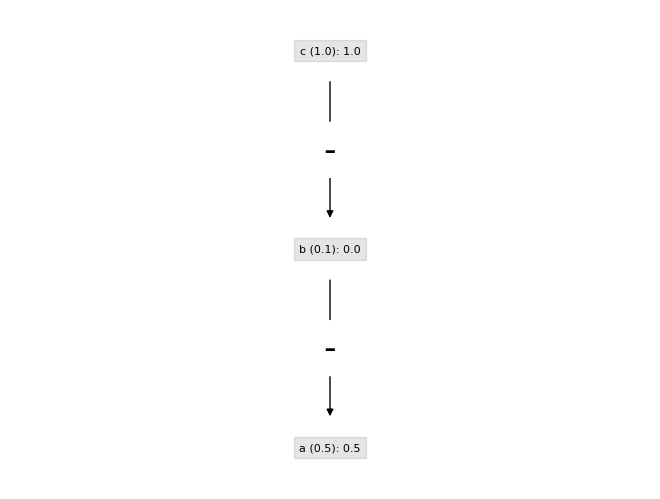

In [51]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 1]
atts = [('b', 'a'), ('c', 'b')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="DFQuAD_model")
ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Proximity

Contribution of a to d: 0.023809523809523836
Contribution of c to d: -0.14832162373145985
|Contribution of c to d| - |Contribution of a to d|: 0.12451209992193601


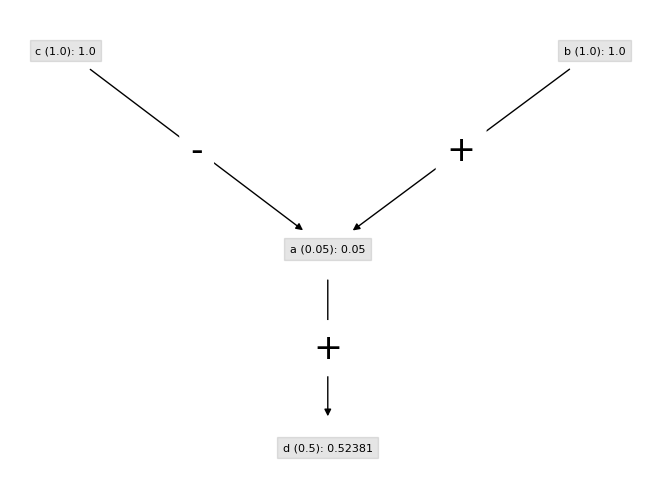

In [52]:
args = ['a', 'b', 'c', 'd']
initial_strengths = [0.05, 1, 1, 0.5]
atts = [('c', 'a')]
supps = [('a', 'd'), ('b', 'a')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_a_to_d = determine_removal_ctrb('d', 'a', qbaf)
ctrb_c_to_d = determine_removal_ctrb('d', 'c', qbaf)
print(f'Contribution of a to d: {ctrb_a_to_d}')
print(f'Contribution of c to d: {ctrb_c_to_d}')
print(f'|Contribution of c to d| - |Contribution of a to d|: {abs(ctrb_c_to_d) - abs(ctrb_a_to_d)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Proximity

Contribution of b to a: -0.007463892798544758
Contribution of c to a: 0.008916125816814224
|Contribution of c to a| - |Contribution of b to a|: 0.0014522330182694665


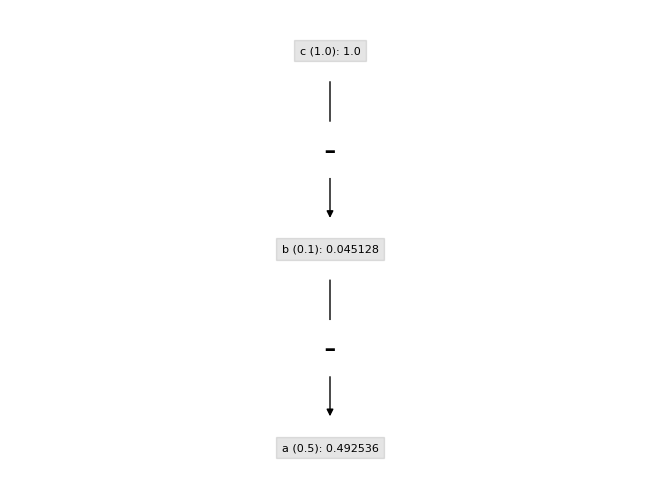

In [53]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 1]
atts = [('b', 'a'), ('c', 'b')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBased_model")
ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Proximity

Contribution of b to a: -0.007463892798544758
Contribution of c to a: 0.008916125816814224
|Contribution of c to a| - |Contribution of b to a|: 0.0014522330182694665


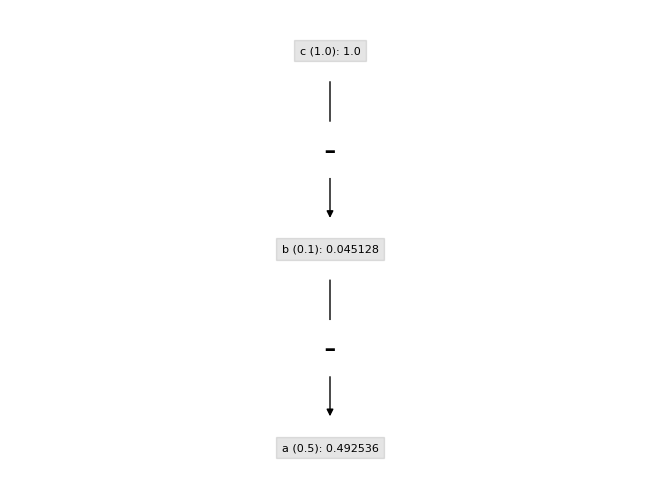

In [54]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 1]
atts = [('b', 'a'), ('c', 'b')]
supps = []
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics="EulerBasedTop_model")
ctrb_b_to_a = determine_removal_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_removal_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

### Intrinsic Removal

#### Quadratic Energy Semantics Violates Proximity

Contribution of b to a: 0.004950495049504955
Contribution of c to a: 0.09593396477214111
|Contribution of c to a| - |Contribution of b to a|: 0.09098346972263616


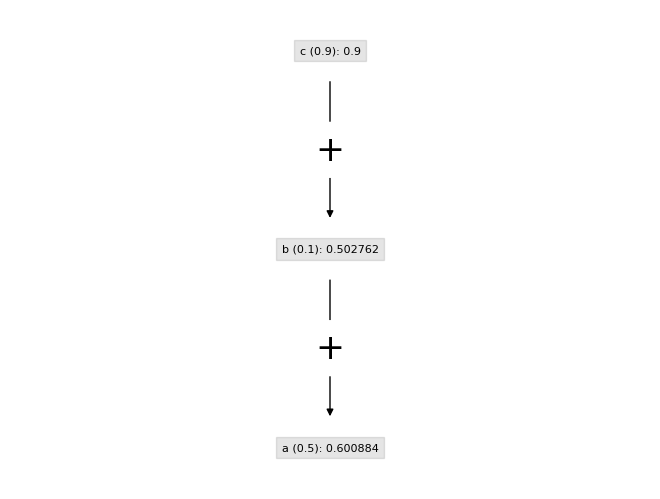

In [55]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Proximity

Contribution of b to a: 0.050000000000000044
Contribution of c to a: 0.405
|Contribution of c to a| - |Contribution of b to a|: 0.355


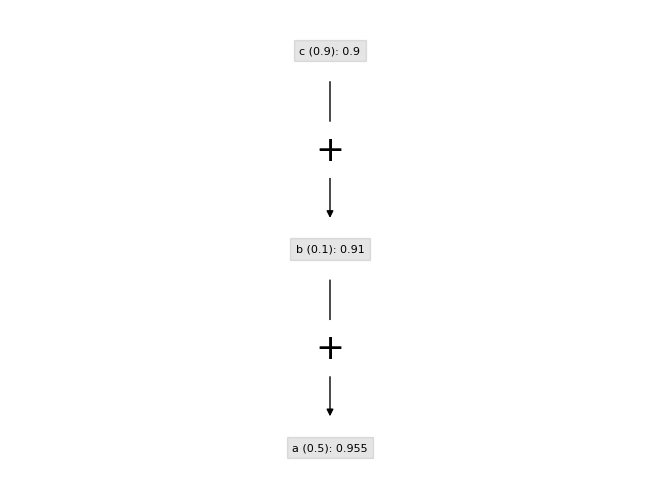

In [56]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"DFQuAD_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Proximity

Contribution of b to a: 0.045454545454545414
Contribution of c to a: 0.12695924764890287
|Contribution of c to a| - |Contribution of b to a|: 0.08150470219435746


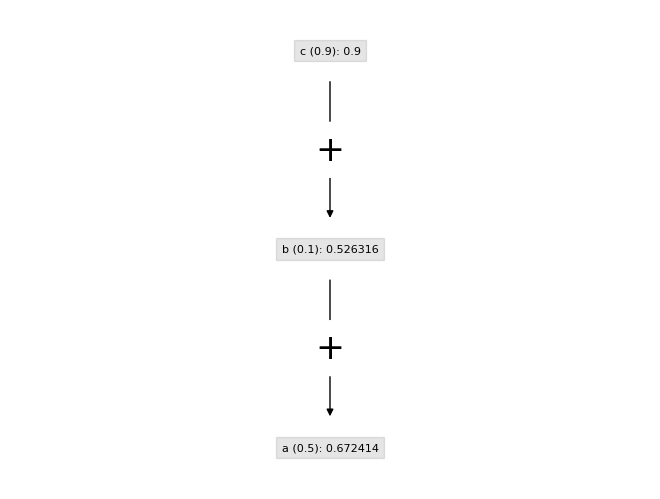

In [57]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Proximity

Contribution of b to a: 0.01693480340541531
Contribution of c to a: 0.018389194084511784
|Contribution of c to a| - |Contribution of b to a|: 0.0014543906790964733


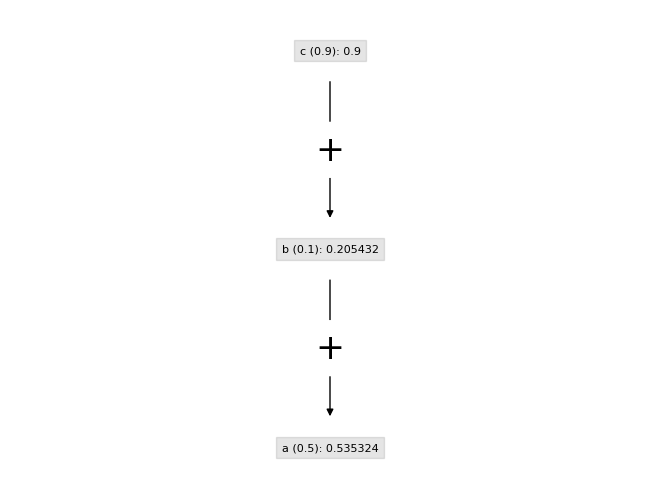

In [58]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Proximity

Contribution of b to a: 0.01693480340541531
Contribution of c to a: 0.018389194084511784
|Contribution of c to a| - |Contribution of b to a|: 0.0014543906790964733


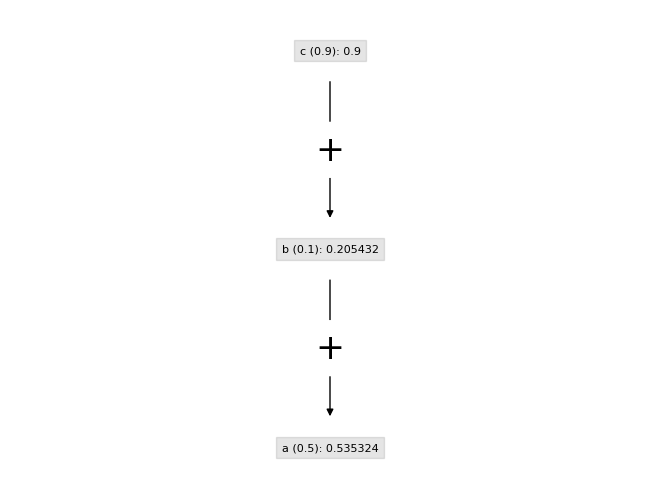

In [59]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBasedTop_model")
ctrb_b_to_a = determine_iremoval_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_iremoval_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

### Shapley Values

#### Quadratic Energy Semantics Violates Proximity

-0.017132528900946947
0.08286747109905306
Contribution of e to a: 4.932615331399619e-05
Contribution of f to a: -0.0005616575596397327
|Contribution of f to a| - |Contribution of e to a|: 0.0005123314063257365


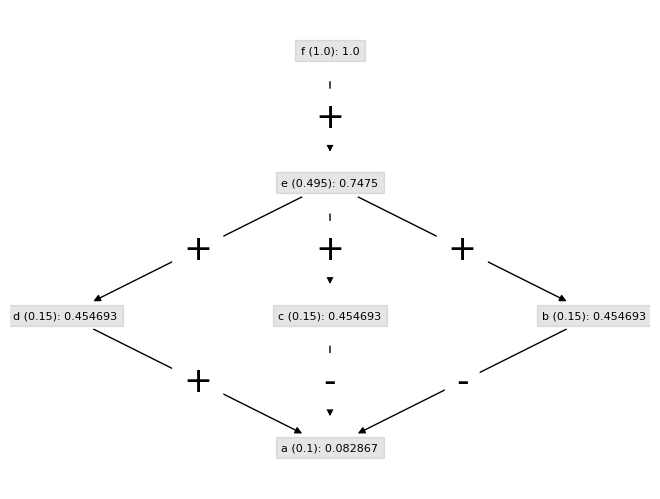

In [60]:
args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.1, 0.15, 0.15, 0.15, 0.495, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
print(0.1 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
###
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'|Contribution of f to a| - |Contribution of e to a|: {abs(ctrb_f_to_a) - abs(ctrb_e_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Proximity

3.8163916471489756e-17
0.10000000000000005
Contribution of e to a: 0.003666666666666678
Contribution of f to a: 0.005666666666666665
|Contribution of f to a| - |Contribution of e to a|: 0.0019999999999999875


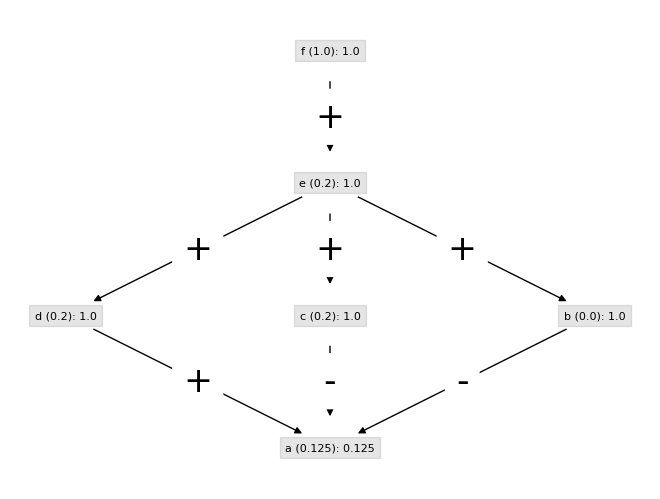

In [61]:
args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.125, 0, 0.2, 0.2, 0.2, 1]
atts = [('b', 'a'), ('c', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"DFQuAD_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
print(0.1 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a]))
###
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'|Contribution of f to a| - |Contribution of e to a|: {abs(ctrb_f_to_a) - abs(ctrb_e_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Proximity

-0.1268339768339768
0.1731660231660232
Contribution of e to a: 0.0006563247765516624
Contribution of f to a: 0.0007494244931840444
|Contribution of f to a| - |Contribution of e to a|: 9.309971663238204e-05


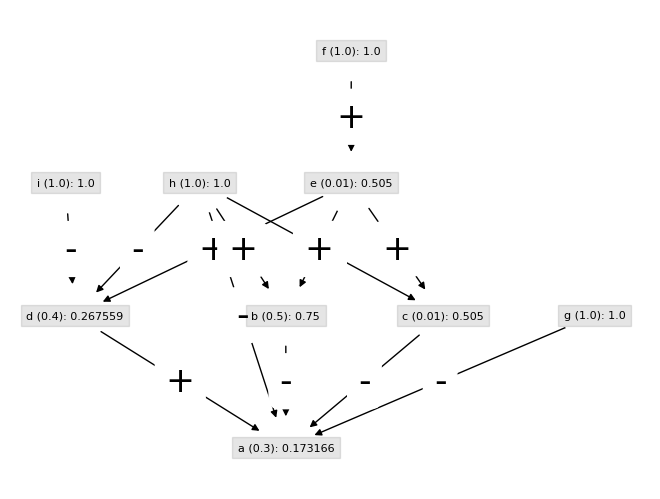

In [62]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
initial_strengths = [0.3, 0.5, 0.01, 0.4, 0.01, 1, 1, 1, 1]
atts = [('b', 'a'), ('c', 'a'), ('g', 'a'), ('h', 'a'), ('h', 'd'), ('i', 'd')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e'), ('h', 'b'), ('h', 'c')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_g_to_a = determine_shapley_ctrb('a', 'g', qbaf)
ctrb_h_to_a = determine_shapley_ctrb('a', 'h', qbaf)
ctrb_i_to_a = determine_shapley_ctrb('a', 'i', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a, ctrb_h_to_a, ctrb_i_to_a]))
print(0.3 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a, ctrb_h_to_a, ctrb_i_to_a]))
###
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'|Contribution of f to a| - |Contribution of e to a|: {abs(ctrb_f_to_a) - abs(ctrb_e_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Proximity

0.005172614986777985
0.505172614986778
Contribution of e to a: -0.00021949357351193995
Contribution of f to a: -0.000259118082313294
|Contribution of f to a| - |Contribution of e to a|: 3.962450880135406e-05


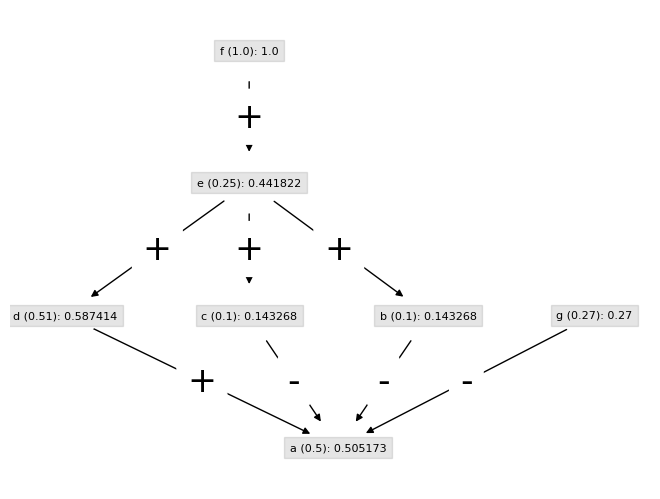

In [63]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
initial_strengths = [0.5, 0.1, 0.1, 0.51, 0.25, 1, 0.27]
atts = [('b', 'a'), ('c', 'a'), ('g', 'a')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd'), ('f', 'e')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_g_to_a = determine_shapley_ctrb('a', 'g', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
print(0.5 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
###
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'|Contribution of f to a| - |Contribution of e to a|: {abs(ctrb_f_to_a) - abs(ctrb_e_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Top Semantics Violates Proximity

0.0036467886907935072
0.3036467886907935
Contribution of e to a: -9.798398608741138e-05
Contribution of f to a: 0.00010751519387043512
|Contribution of f to a| - |Contribution of e to a|: 9.531207783023738e-06


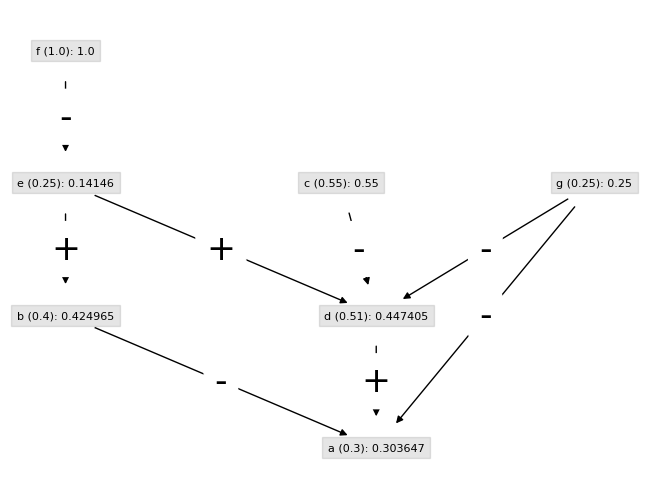

In [64]:
args = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
initial_strengths = [0.3, 0.4, 0.55, 0.51, 0.25, 1, 0.25]
atts = [('b', 'a'), ('g', 'a'), ('f', 'e'), ('c', 'd'), ('g', 'd')]
supps = [('d', 'a'), ('e', 'b'), ('e', 'd')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBasedTop_model")
ctrb_e_to_a = determine_shapley_ctrb('a', 'e', qbaf)
ctrb_f_to_a = determine_shapley_ctrb('a', 'f', qbaf)
### Check 'efficiency', contribution of arguments to a
ctrb_b_to_a = determine_shapley_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_shapley_ctrb('a', 'c', qbaf)
ctrb_d_to_a = determine_shapley_ctrb('a', 'd', qbaf)
ctrb_g_to_a = determine_shapley_ctrb('a', 'g', qbaf)
print(sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
print(0.3 + sum([ctrb_b_to_a, ctrb_c_to_a, ctrb_d_to_a, ctrb_e_to_a, ctrb_f_to_a, ctrb_g_to_a]))
###
print(f'Contribution of e to a: {ctrb_e_to_a}')
print(f'Contribution of f to a: {ctrb_f_to_a}')
print(f'|Contribution of f to a| - |Contribution of e to a|: {abs(ctrb_f_to_a) - abs(ctrb_e_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

### Gradient

#### Quadratic Energy Semantics Violates Proximity

Contribution of b to a: 0.10811297595500946
Contribution of d to a: 0.2945348098874092
|Contribution of d to a| - |Contribution of b to a|: 0.18642183393239975


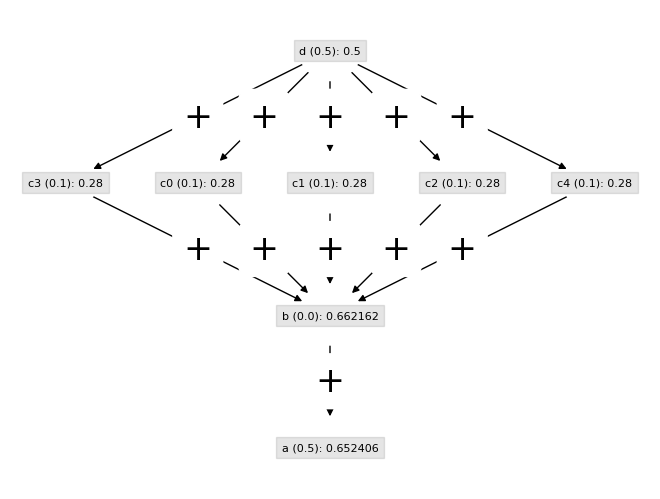

In [65]:
args = ['a', 'b', 'd']
initial_strengths = [0.5, 0, 0.5]
atts = []
supps = [('b', 'a')]
for i in range(0, 5):
  args.append(f'c{i}')
  initial_strengths.append(0.1)
  supps.append((f'c{i}', 'b'))
  supps.append(('d', f'c{i}'))
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"QuadraticEnergy_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of d to a: {ctrb_d_to_a}')
print(f'|Contribution of d to a| - |Contribution of b to a|: {abs(ctrb_d_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### DFQuAD Semantics Violates Proximity

Contribution of b to a: 0.04999999701976776
Contribution of c to a: 0.44999999552965164
|Contribution of c to a| - |Contribution of b to a|: 0.3999999985098839


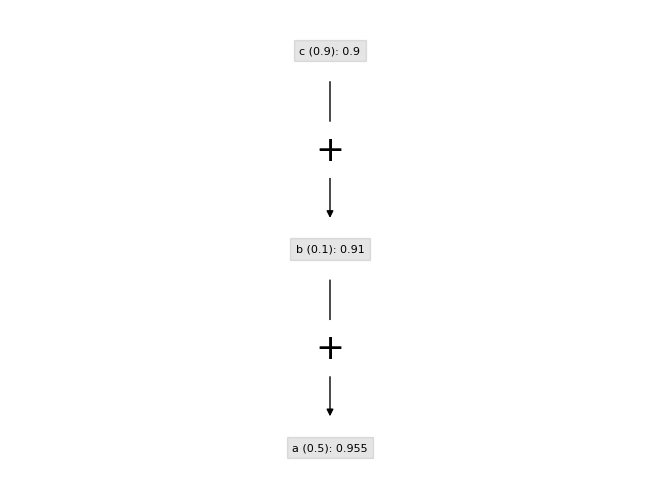

In [66]:
args = ['a', 'b', 'c']
initial_strengths = [0.5, 0.1, 0.9]
atts = []
supps = [('b', 'a'), ('c', 'b')]
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"DFQuAD_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
ctrb_c_to_a = determine_gradient_ctrb('a', 'c', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of c to a: {ctrb_c_to_a}')
print(f'|Contribution of c to a| - |Contribution of b to a|: {abs(ctrb_c_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Squared DFQuAD Semantics Violates Proximity

Contribution of b to a: 0.12096293270587921
Contribution of d to a: -0.23393578827381134
|Contribution of d to a| - |Contribution of b to a|: 0.11297285556793213


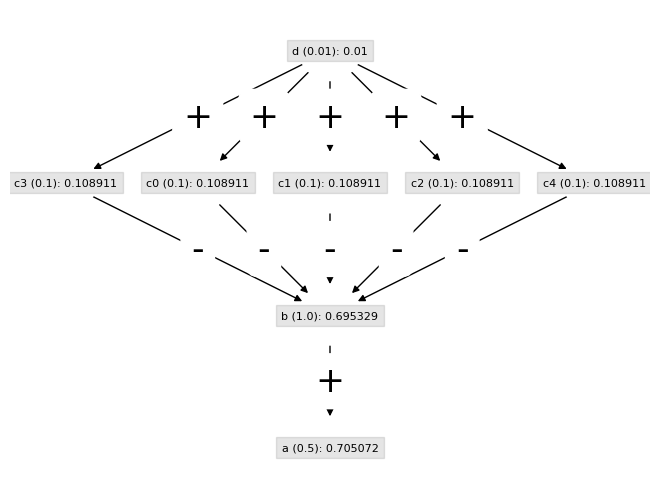

In [67]:
args = ['a', 'b', 'd']
initial_strengths = [0.5, 1, 0.01]
atts = []
supps = [('b', 'a')]
for i in range(0, 5):
  args.append(f'c{i}')
  initial_strengths.append(0.1)
  atts.append((f'c{i}', 'b'))
  supps.append(('d', f'c{i}'))
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"SquaredDFQuAD_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of d to a: {ctrb_d_to_a}')
print(f'|Contribution of d to a| - |Contribution of b to a|: {abs(ctrb_d_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)

#### Euler-based Semantics Violates Proximity

Contribution of b to a: 0.008349046111106873
Contribution of d to a: 0.010144941508769989
|Contribution of d to a| - |Contribution of b to a|: 0.0017958953976631165


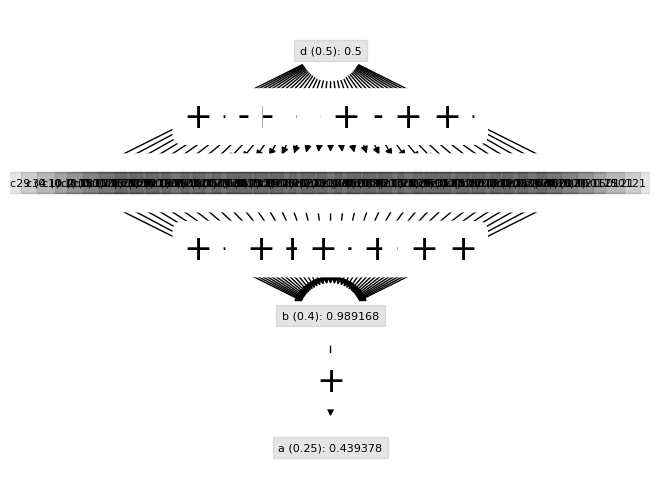

In [68]:
args = ['a', 'b', 'd']
initial_strengths = [0.25, 0.4, .5]
atts = []
supps = [('b', 'a')]
for i in range(0, 35):
  args.append(f'c{i}')
  initial_strengths.append(0.1)
  supps.append((f'c{i}', 'b'))
  supps.append(('d', f'c{i}'))
qbaf = QBAFramework(args, initial_strengths, atts, supps, semantics=f"EulerBased_model")
ctrb_b_to_a = determine_gradient_ctrb('a', 'b', qbaf)
ctrb_d_to_a = determine_gradient_ctrb('a', 'd', qbaf)
print(f'Contribution of b to a: {ctrb_b_to_a}')
print(f'Contribution of d to a: {ctrb_d_to_a}')
print(f'|Contribution of d to a| - |Contribution of b to a|: {abs(ctrb_d_to_a) - abs(ctrb_b_to_a)}')
visualize(qbaf, with_fs=True, round_to=6)